# DataCo Global supply chain data analysis

with the DataCo company, dataset customer segmentation analysis was performed in this project which helps the company to better understand its customers and target them to increase customer responsiveness and the company's revenue. 
The machine learning classifiers used in this project are Logistic Regression,Linear Discriminant Analysis, Gaussian Naive Bayes, Support Vector Machines, k - Nearest Neighbors, Random Forest classification, Extra Trees classification, Decision Tree classification for fraud detection and to predict late delivery on the basis accuracy, recall score and F1 score. --Huiwen Wang

# Data Collection

The dataset consists of roughly 180k transactions from supply chains used by the company DataCo Global for 3 years. The dataset can be downloaded from:

https://data.mendeley.com/datasets/8gx2fvg2k6/5

### Importing all required libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm,tree,preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from IPython.core import display as ICD

import warnings
warnings.filterwarnings('ignore') 


In [2]:
#Download data，around 90M
# url='https://gitee.com/banlangen233/data-sample/releases/download/DataSample/DataCoSupplyChainDataset.csv'
# datafile=requests.get(url)
# open('./Data/DataCoSupplyChainDataset.csv','wb').write(datafile.content)

In [3]:
#Importing Dataset using pandas
dataset=pd.read_csv("./Data/DataCoSupplyChainDataset.csv",header= 0,encoding= 'unicode_escape')
dataset.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Data Cleaning

In [4]:
dataset.shape

(180519, 53)

The total data set consists of 180519 records and 53 columns

In [5]:
dataset.apply(lambda x: sum(x.isnull())) #Checking missing values

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


The data consists of some missing values from Customer Lname, Product Description, Order Zipcode and, Customer Zipcode which should be removed or replaced before proceeding with the analysis. And also, since there is a chance different customers might have the same first name or same last name a new column with ‘customer full name’ is created to avoid any ambiguities.

In [6]:
# Adding first name and last name together to create new column
dataset['Customer Full Name'] = dataset['Customer Fname'].astype(str)+dataset['Customer Lname'].astype(str)

To make it easier for analysis some unimportant columns are dropped

In [7]:
data=dataset.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
data.shape

(180519, 42)


There are 3 missing values in Customer Zipcode column. Since the missing values are just zip codes which are not very important these are replaced with zero before proceeding with data analysis.

In [8]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)#Filling NaN columns with zero

Export 2017 data as a data set for VBA analysis

In [9]:
# data['order date (DateOrders)']=pd.to_datetime(data['order date (DateOrders)'])

# data2=data[data['order date (DateOrders)'].dt.year == 2017]
# data2.to_excel(excel_writer='./Data.xlsx', sheet_name='sheet1',index=False,engine='openpyxl')

# Data Visualisation

To find important parameters, data correlation is performed.

Text(0.5, 1.0, 'Correlation heatmap of supply chain data')

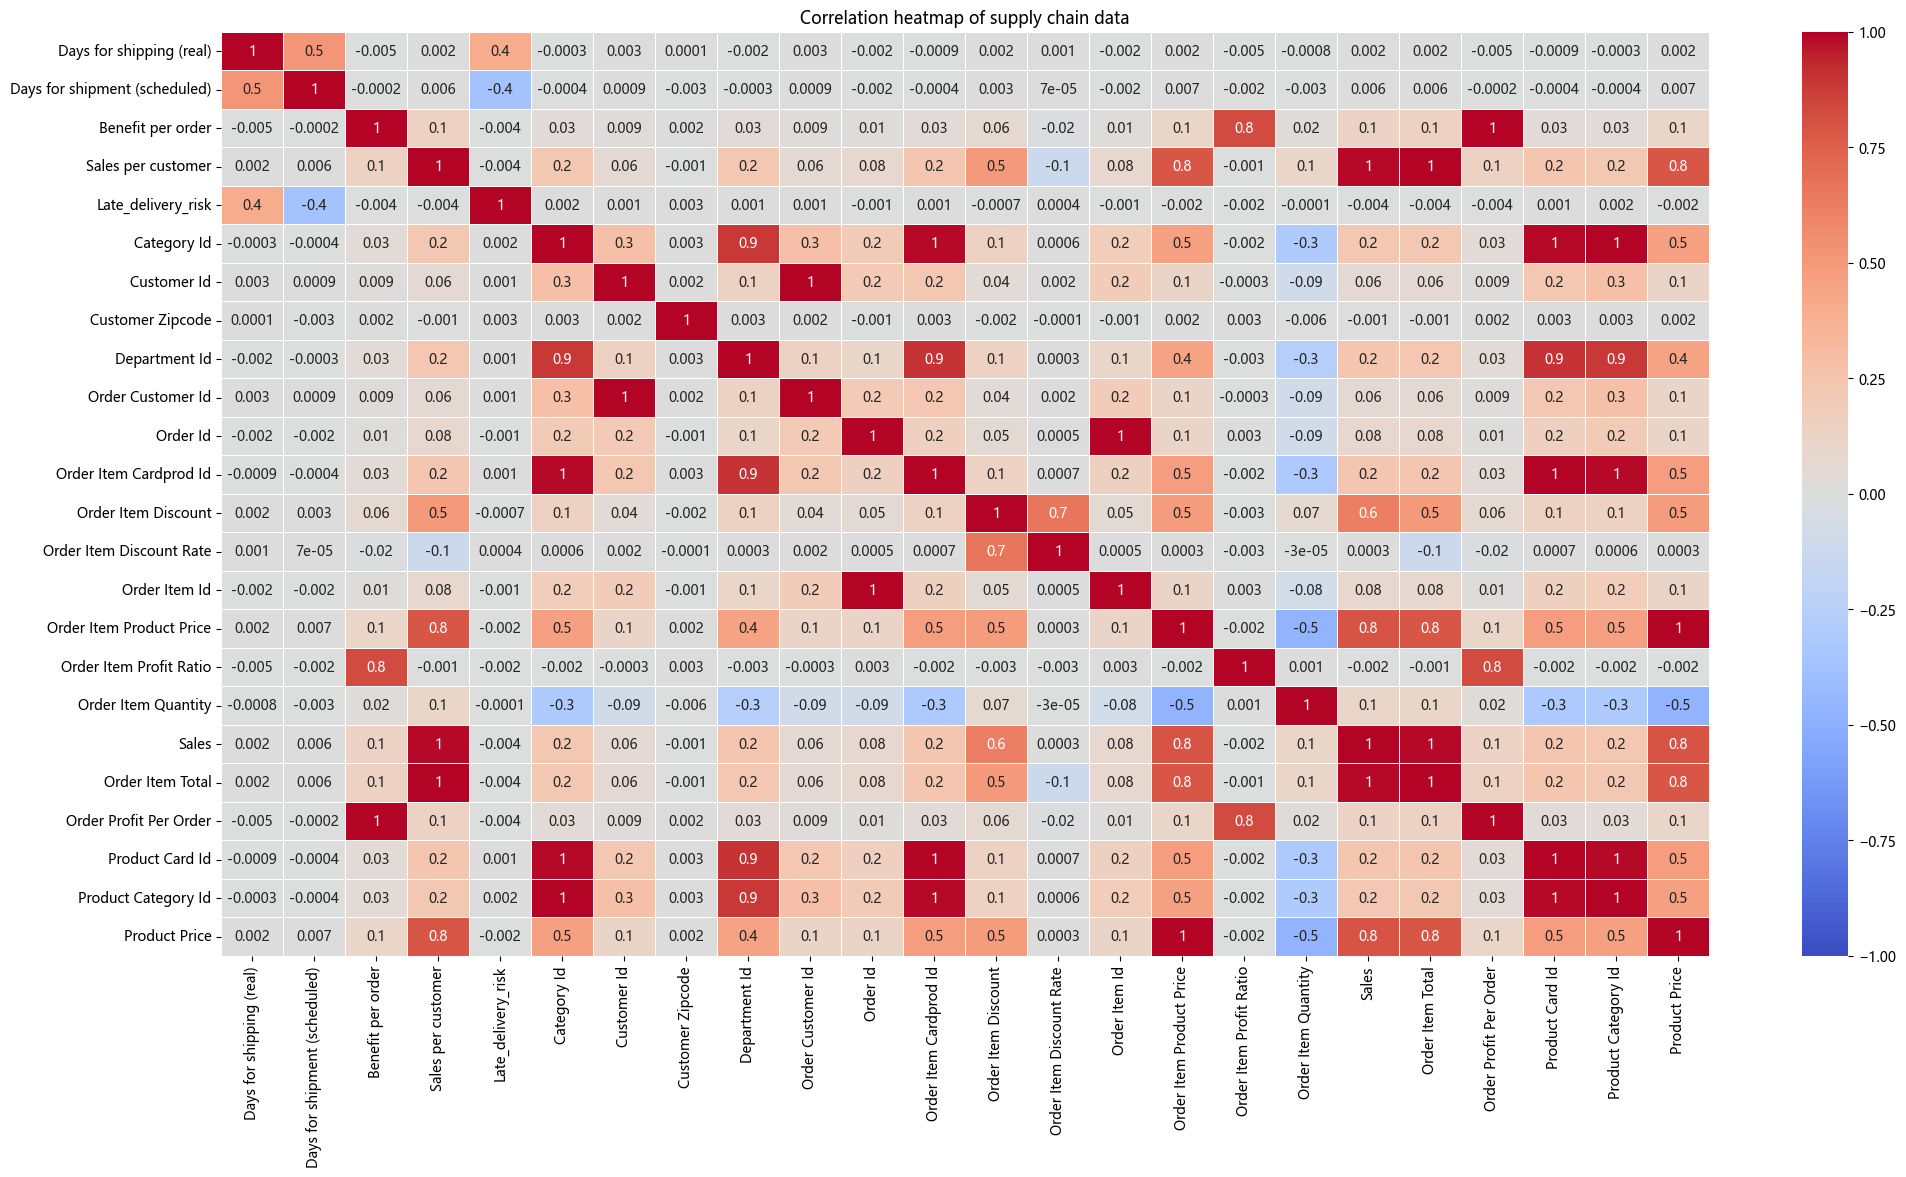

In [10]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
fig, ax = plt.subplots(figsize=(24,12))         
sns.heatmap(data.corr(numeric_only=True),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm', vmin=-1, vmax=1)
ax.set_title('Correlation heatmap of supply chain data')

We can observe that product price price has high correlation with Sales,Order Item Total.

View sales by Market & Order Region

<Axes: title={'center': 'Total sales for all regions'}, xlabel='Order Region'>

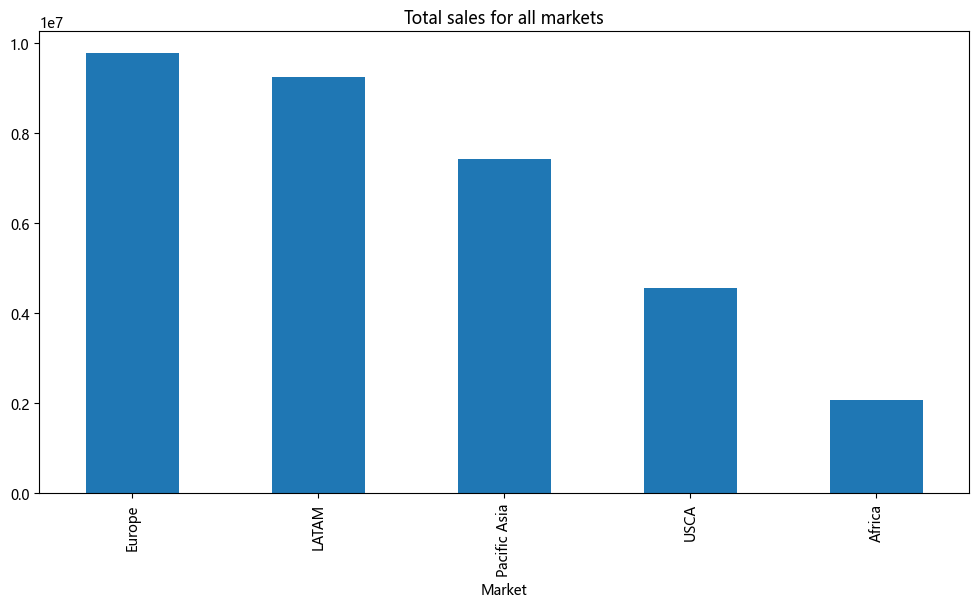

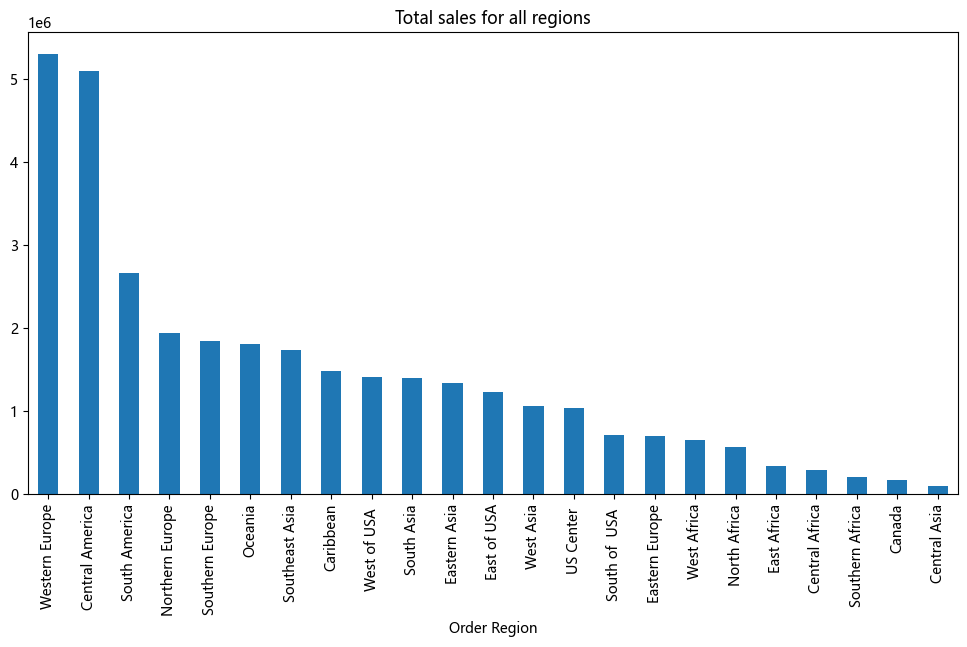

In [11]:
market = data.groupby('Market') #Grouping by market
region = data.groupby('Order Region') #Grouping by Order Region
plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

It could be seen from the graph that European market has the most number of sales whereas Africa has the least.In these markets western europe regions and central america recorded highest sales. 

View top-selling product categories

<Axes: title={'center': 'Average price'}, xlabel='Category Name'>

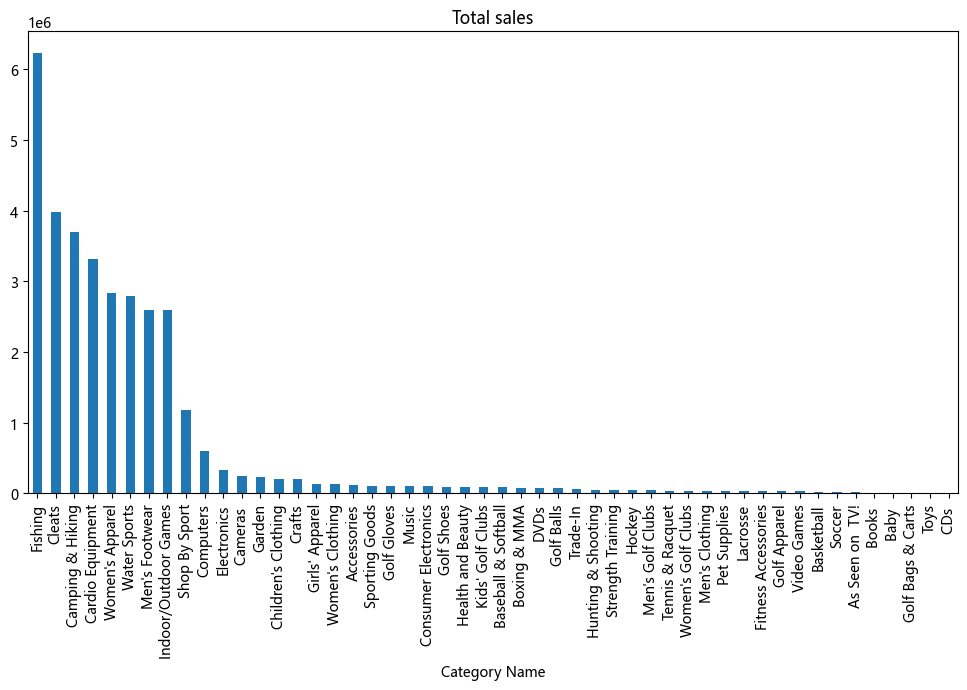

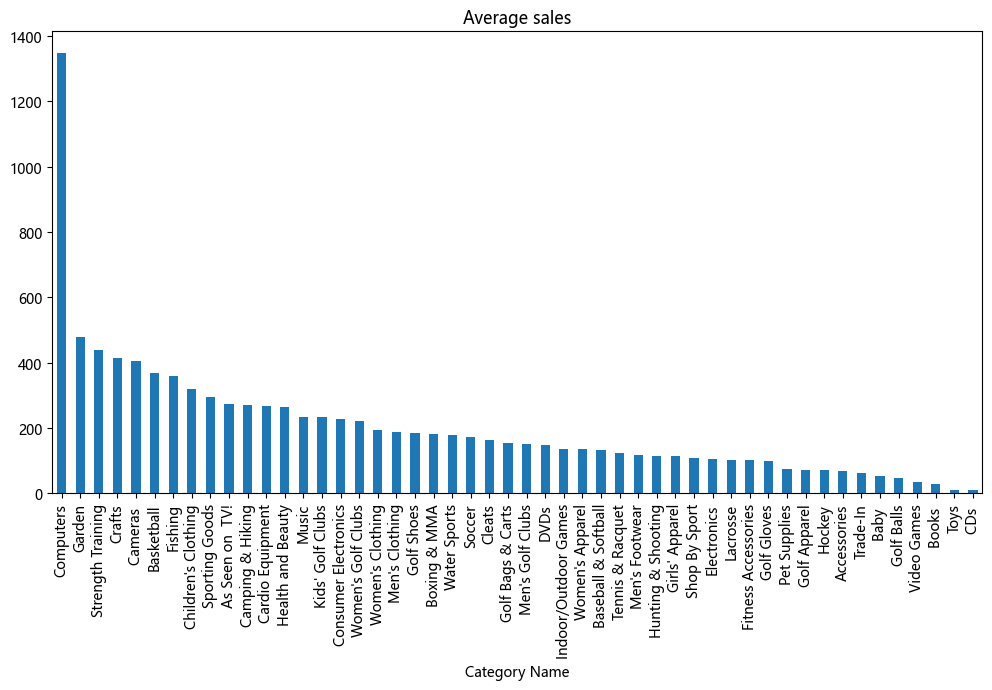

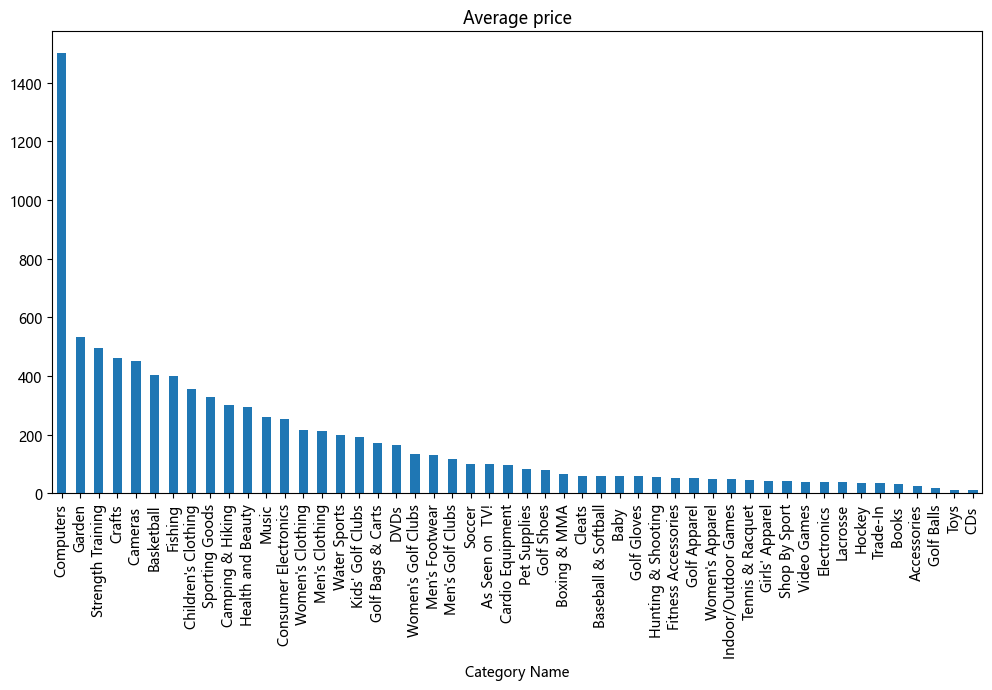

In [12]:
#Grouping all categories
cat = data.groupby('Category Name')
plt.figure(1)
# Total sum of sales for all categories
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")
# Mean sales for all categories
plt.figure(2)
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(3)
# Mean prices for all categories
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")

As we can see that the fishing category had most number of sales followed by the Cleats.However it is suprising to see that top 7 products with highest price on average are the most sold products on average with computers having almost 1350 sales despite price being 1500$. Since correlation was high between Price and Sales it will be intresting to see how price is impacting the sales for all the products to see the trend.

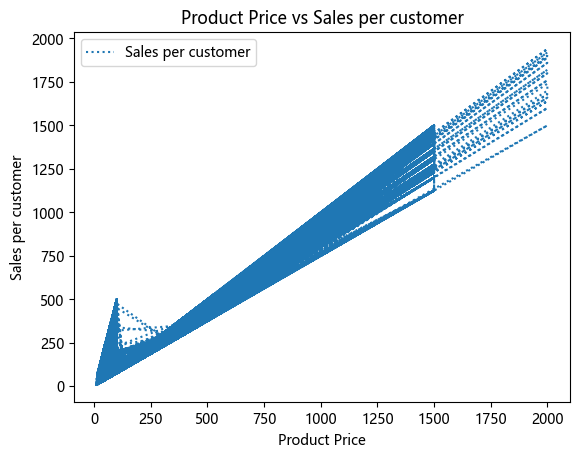

In [13]:
data.plot(x='Product Price', y='Sales per customer',linestyle='dotted',
     markerfacecolor='blue', markersize=12) 
plt.title('Product Price vs Sales per customer')
plt.xlabel('Product Price')  
plt.ylabel('Sales per customer') 
plt.show()

It can be observed that prices has linear relation with sales. 

In [14]:

data['order_year']= pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_week_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

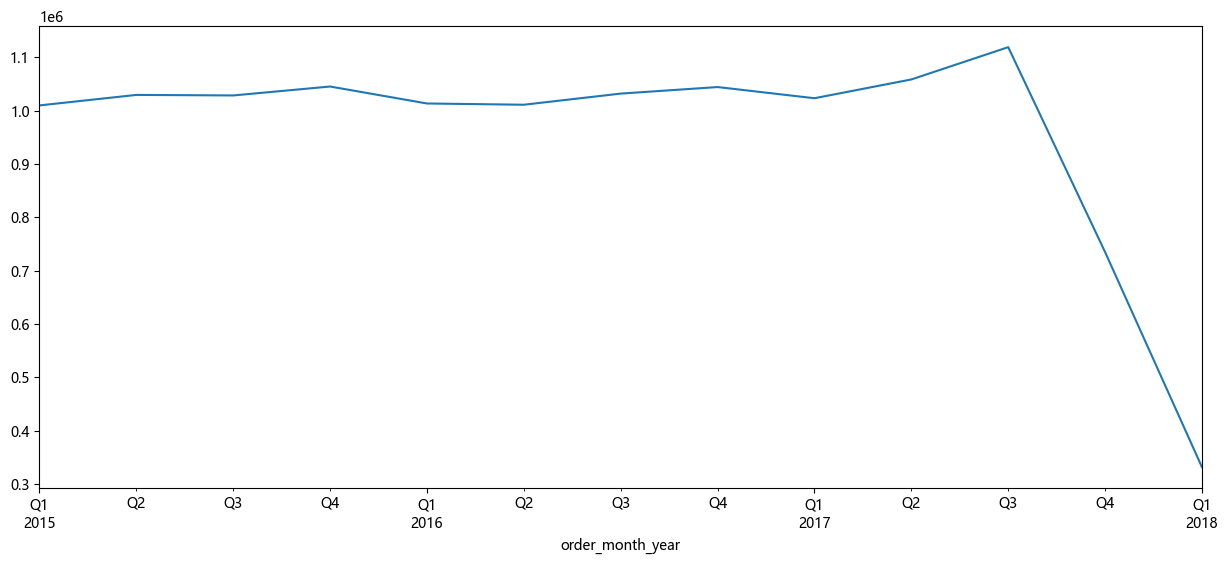

In [15]:
quater= data.groupby('order_month_year')
quartersales=quater['Sales'].sum().resample('Q').mean().plot(figsize=(15,6))

By seeing above graph it can be seen that sales are consistent from Q1 2015 until Q3 of 2017 and suddenly dipped by Q1 2018. 

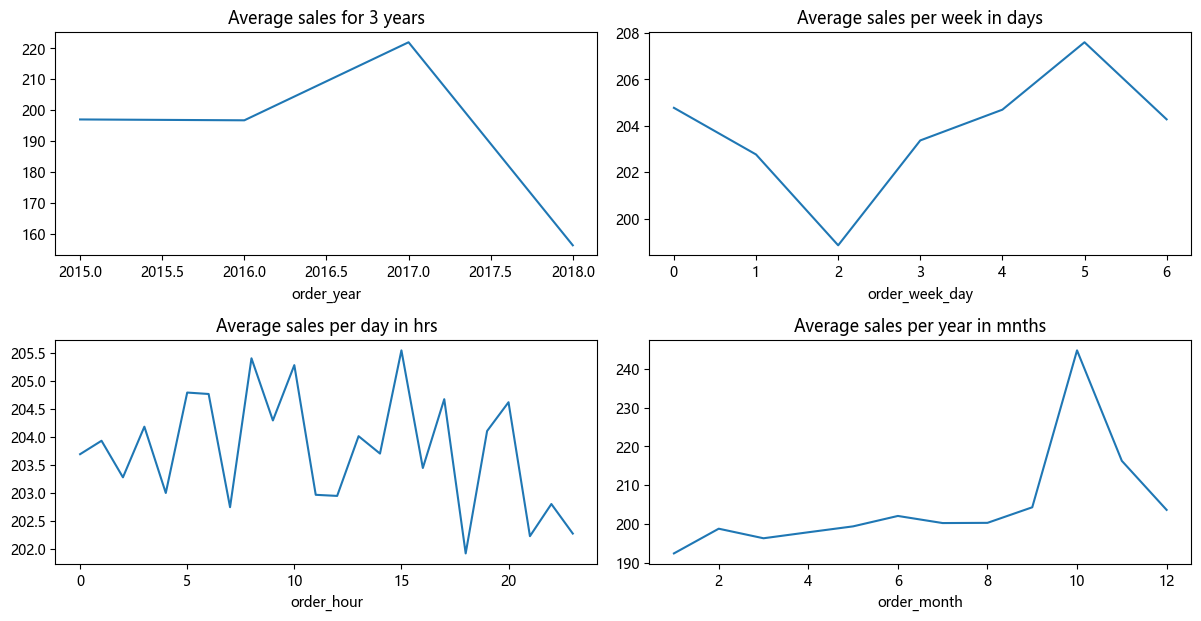

In [16]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater= data.groupby('order_year')
quater['Sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=data.groupby("order_week_day")
days['Sales'].mean().plot(figsize=(12,12),title='Average sales per week in days')
plt.subplot(4, 2, 3)
hrs=data.groupby("order_hour")
hrs['Sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')
plt.subplot(4, 2, 4)
mnth=data.groupby("order_month")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')
plt.tight_layout()
plt.show()

How price is impacting sales, when and which products are having more sales are found.The most number of orders came in October followed by November, and orders for all other months are consistent.Highest number of orders are placed by customers in 2017. 
Saturday recorded highest number of average sales and wednesday with the least number of sales. The average sales are consistent throughout the day irrespective of time with std of 3.

It is also important to know what type of payment method is being preferred by people to buy all these products in all regions? It can be found using .unique() method to see different payment methods.

In [17]:
data['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

It is found that four types of payment methods are used.Which payment method is preferred the most by people in different regions?

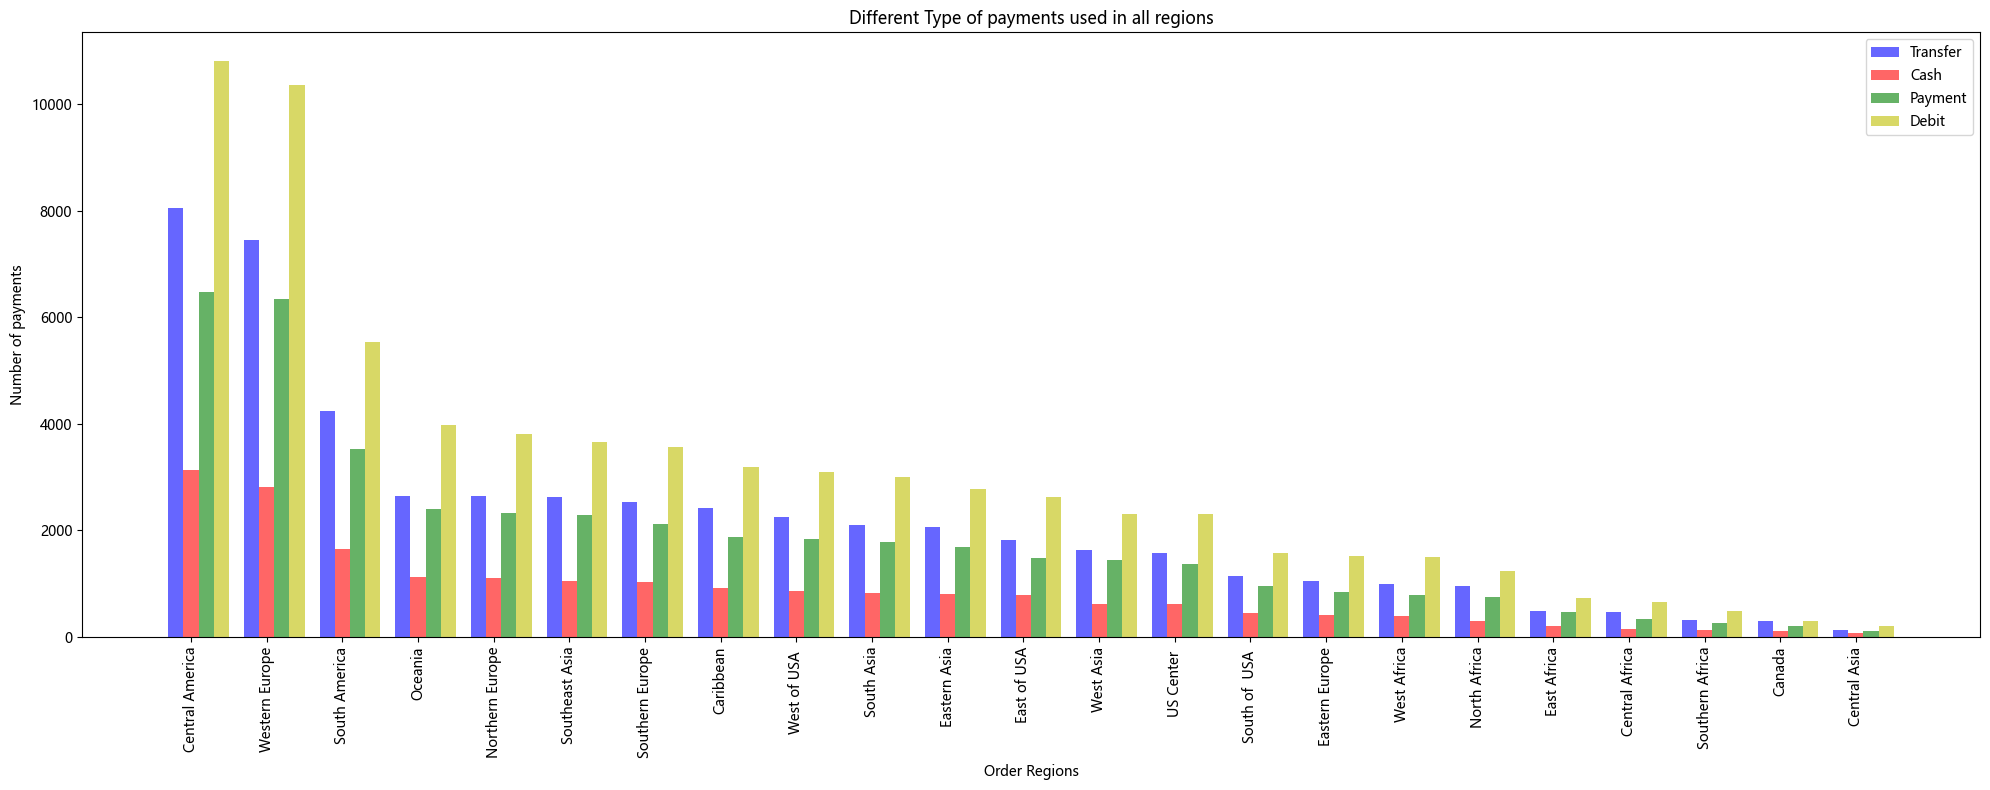

In [18]:
xyz1 = data[(data['Type'] == 'TRANSFER')]
xyz2= data[(data['Type'] == 'CASH')]
xyz3= data[(data['Type'] == 'PAYMENT')]
xyz4= data[(data['Type'] == 'DEBIT')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()


Debit type is most preferred payment method by people in all regions, Cash payment being the least preferred method.

Some products are having negative benefit per orders which indicates that the orders are generating loss of revenue to the company. 

Total revenue lost with orders -3883547.345768667


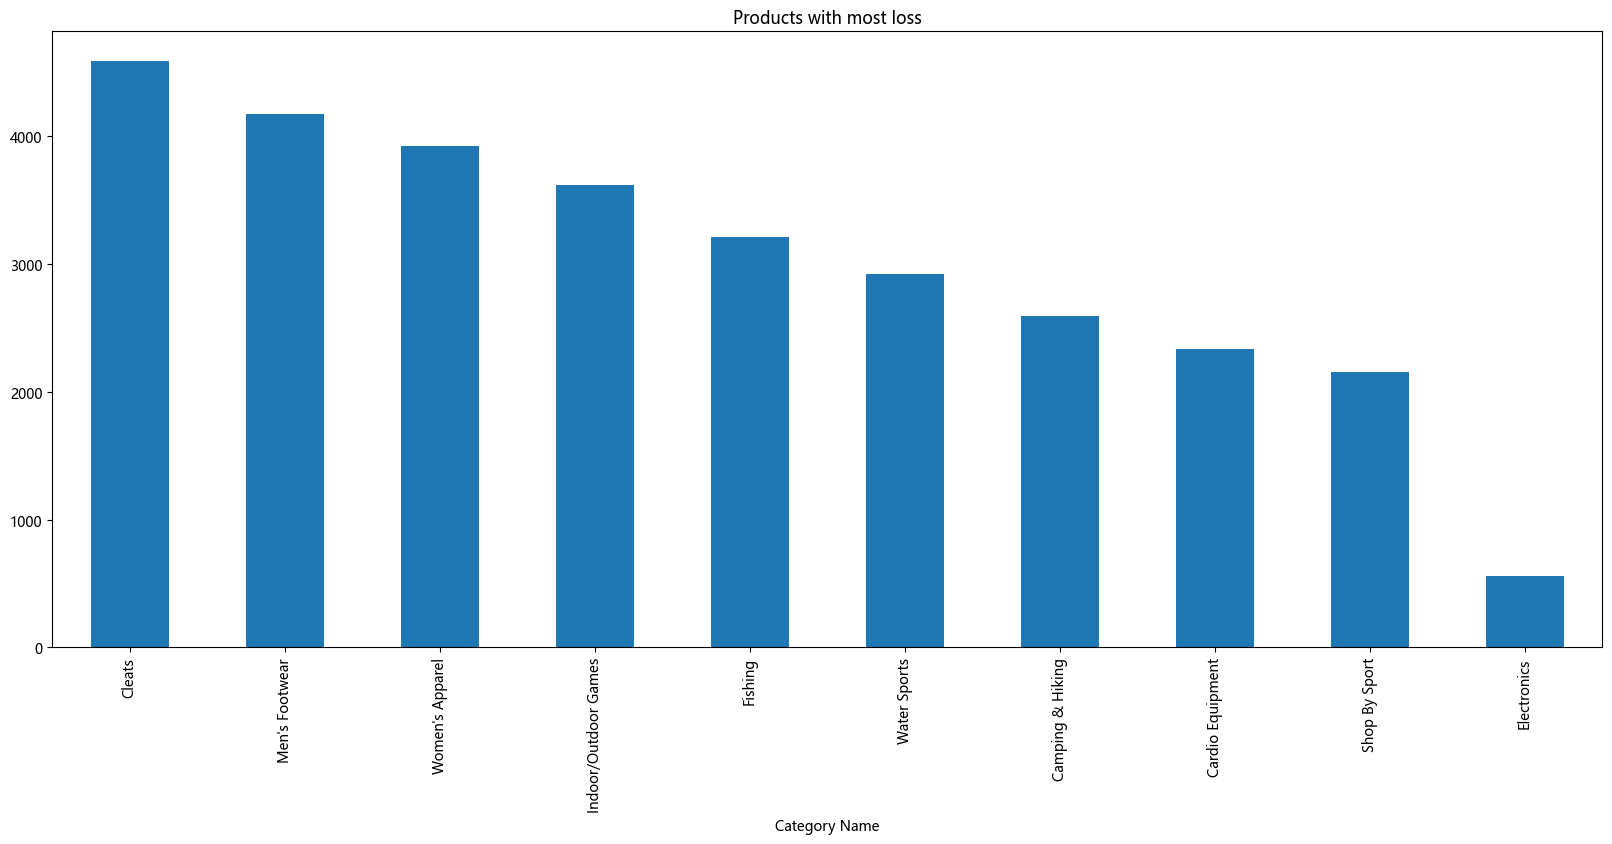

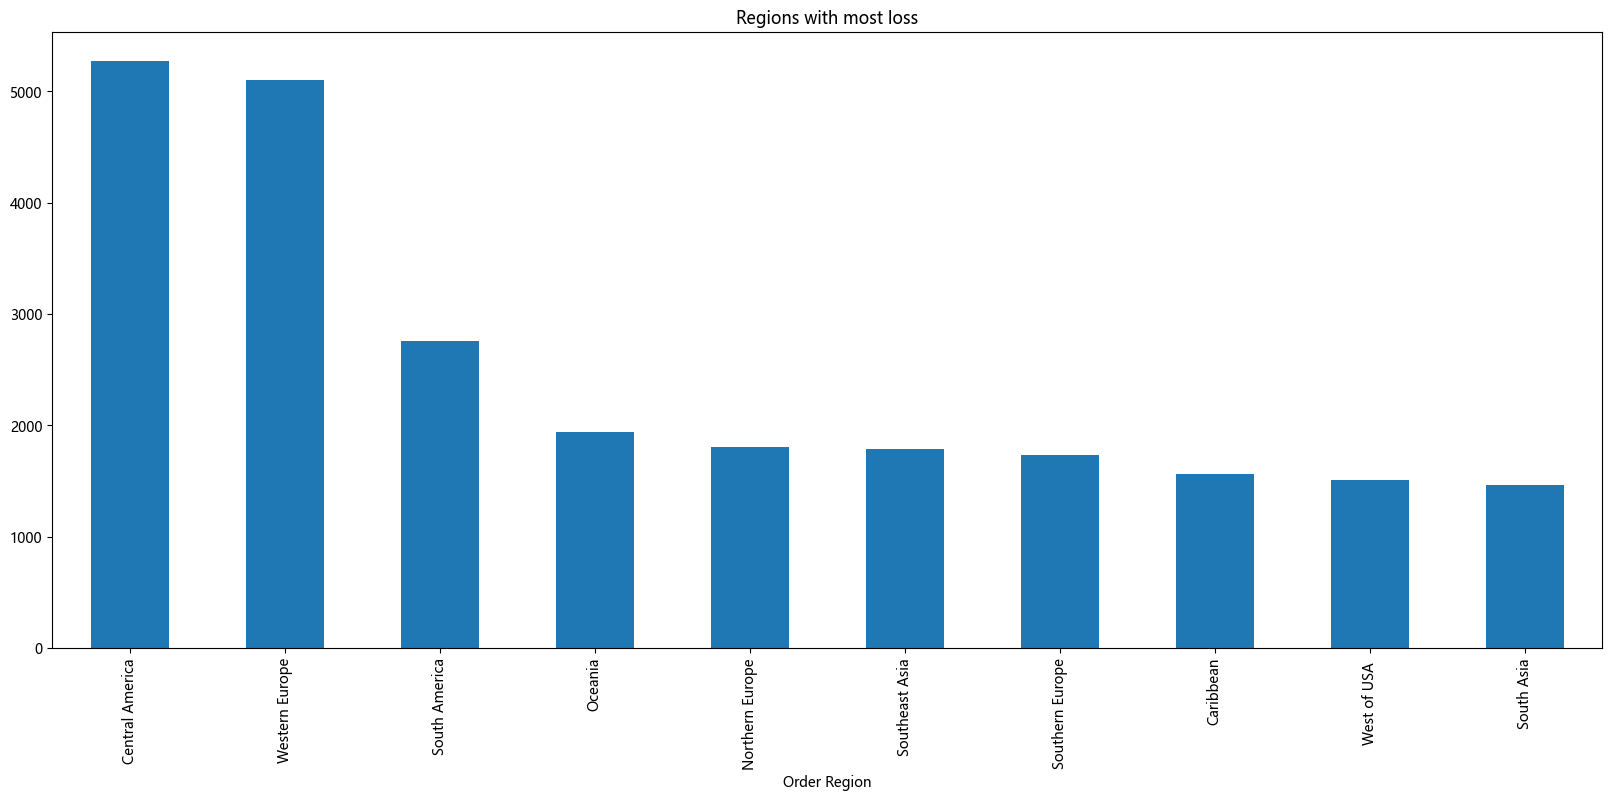

In [19]:
loss = data[(data['Benefit per order']<0)]
#Plotting top 10 products with most loss
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most loss")
plt.figure(2)
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most loss")

print('Total revenue lost with orders',loss['Benefit per order'].sum())

The total loss sales are approximately 3.9 Millions which is an huge amount.It can be seen that Cleats is the category with most loss sales followed by Mens footwear.Most lost sales are happeing in central america and western europe region.  

This lost sales may have happened due to order status or delivery status.

<Axes: title={'center': 'Delivery status of lost'}, xlabel='Delivery Status'>

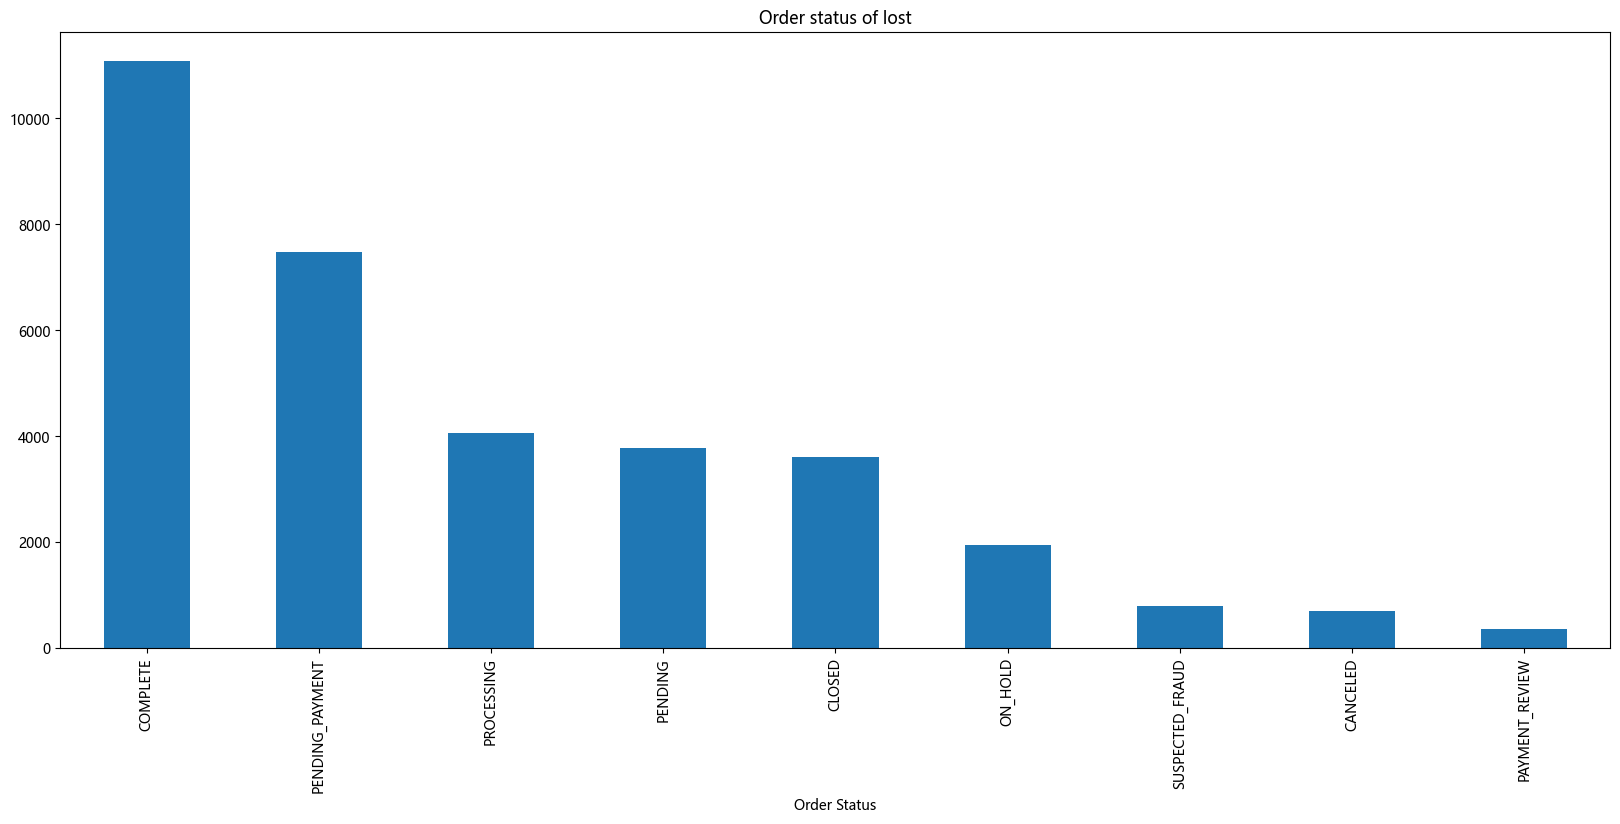

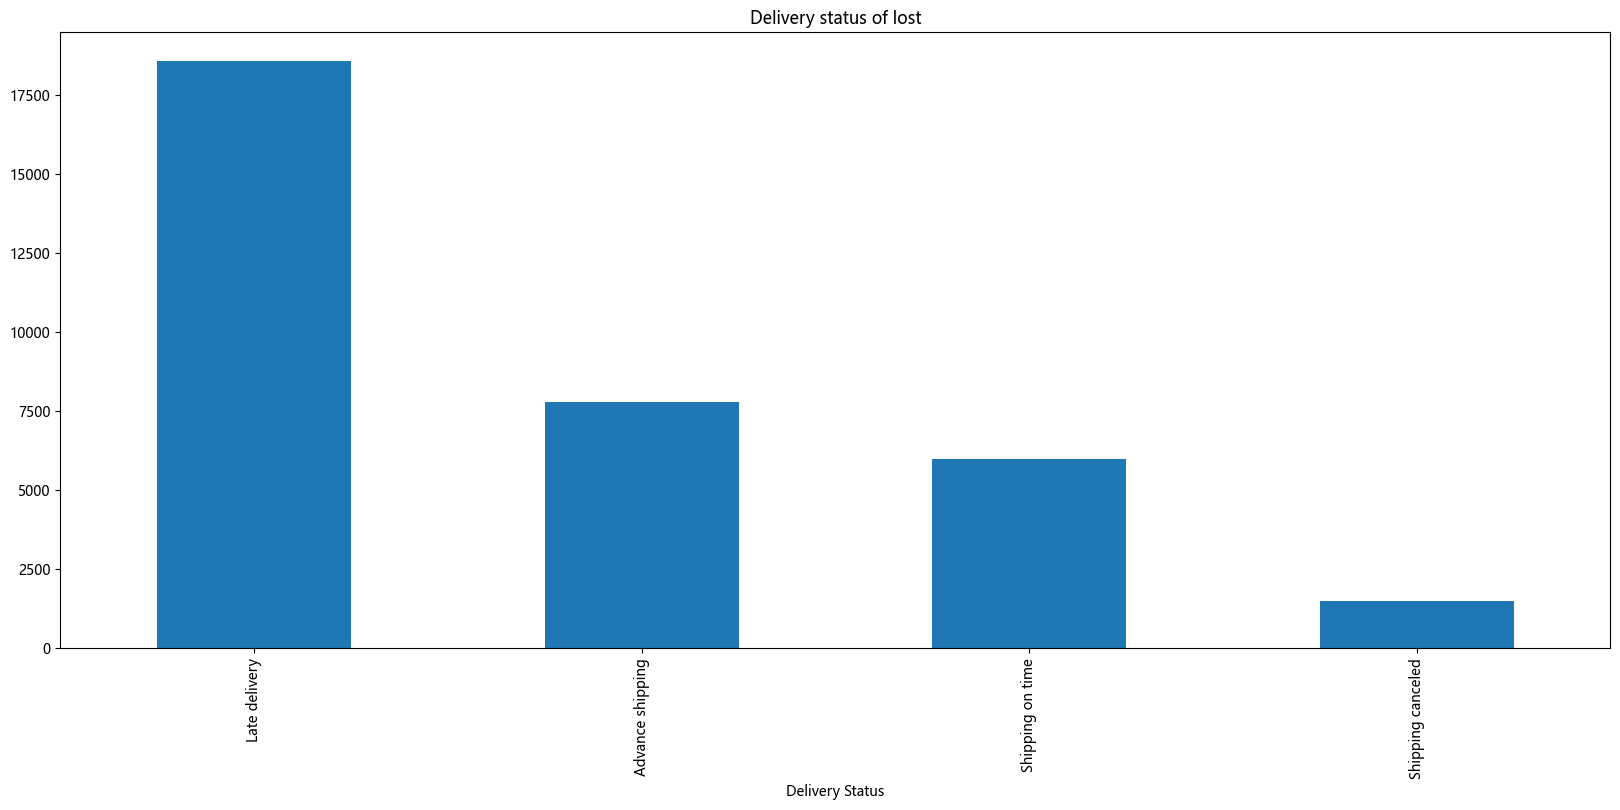

In [20]:
plt.figure(1)
loss['Order Status'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Order status of lost")
plt.figure(2)
loss['Delivery Status'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Delivery status of lost")

It can be seen that a large part of the loss is caused by late delivery. In addition, there is also a small part of order fraud.

Check the product category and ordering region of the late delivery.

<Axes: title={'center': 'Regions with late delivery'}, xlabel='Order Region'>

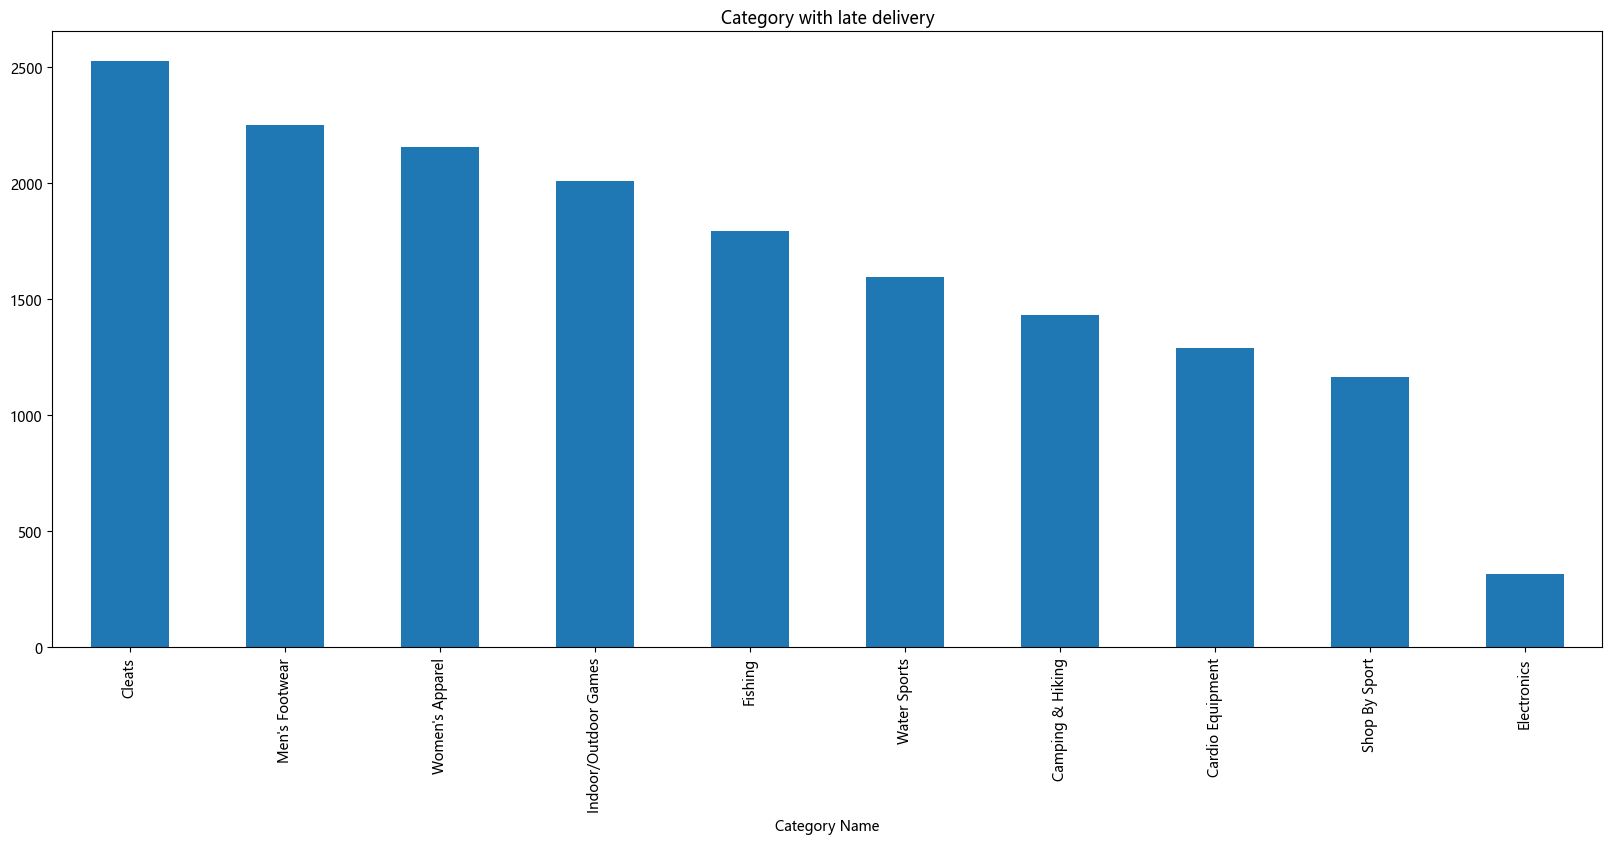

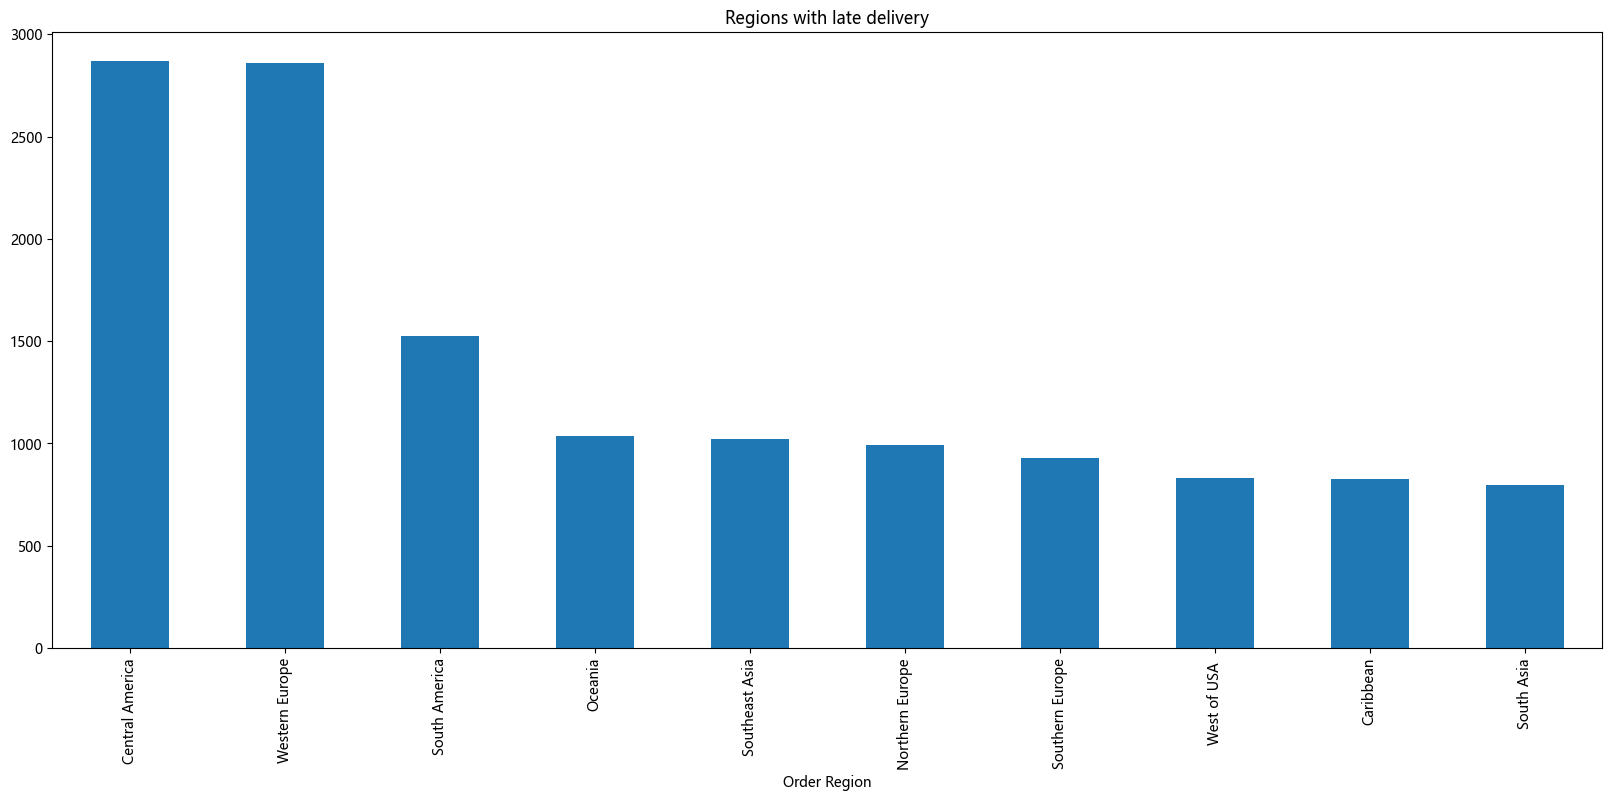

In [21]:
delayloss = data[(data['Benefit per order']<0)&(data['Delivery Status']=='Late delivery')]
plt.figure(1)
delayloss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Category with late delivery")
plt.figure(2)
delayloss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with late delivery")

It can be seen that the products and regions with Late delivery are basically consistent with the loss.So we should focus on the Late delivery of Cleats and Mens footwear, and the order of central america and western europe region

Finding Which region and what product is being suspected to the fraud the most to  prevent fraud from happening in future

In [22]:
xyz = data[(data['Order Status'] == 'SUSPECTED_FRAUD')]
xyz['Order Region'].value_counts()

Order Region
Western Europe     705
Central America    631
South America      361
West of USA        236
Oceania            229
Southern Europe    223
Caribbean          190
Southeast Asia     187
Northern Europe    170
Eastern Asia       156
East of USA        150
West Asia          147
South Asia         144
US Center          121
North Africa        75
Eastern Europe      74
West Africa         71
South of  USA       66
Southern Africa     32
East Africa         31
Canada              29
Central Africa      28
Central Asia         6
Name: count, dtype: int64

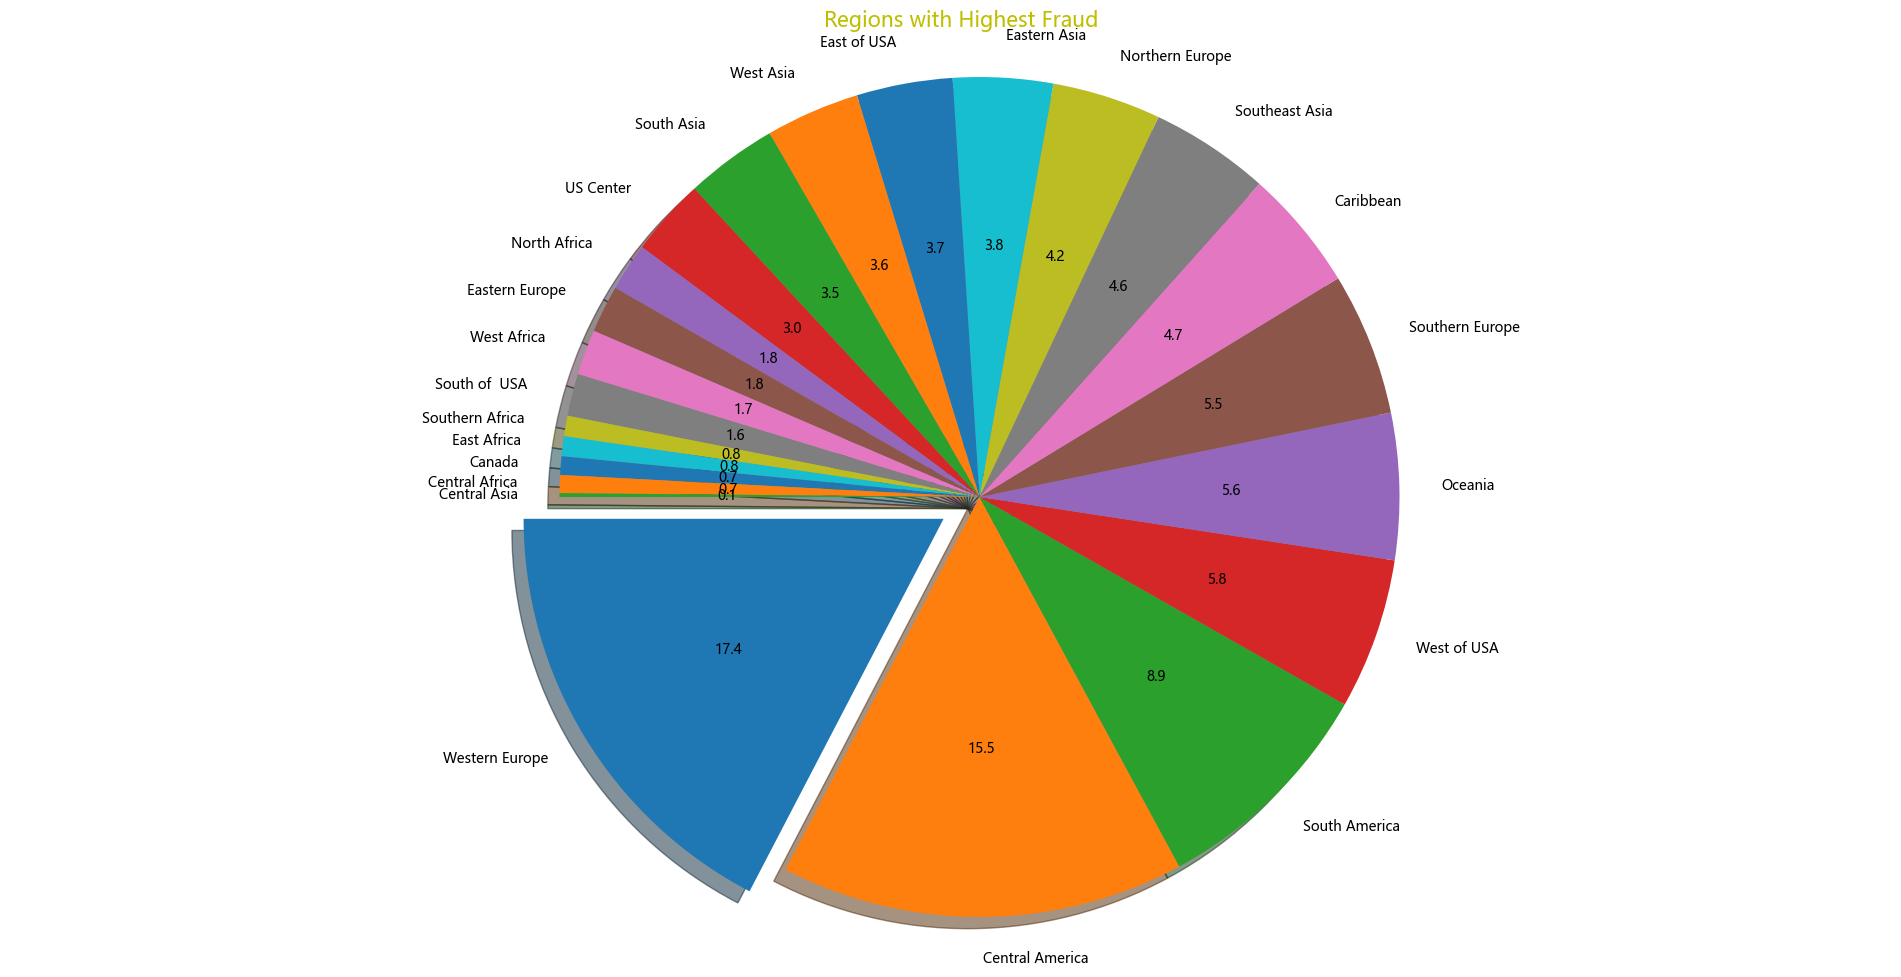

In [23]:
high_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') ]

fraud=high_fraud['Order Region'].value_counts().plot.pie(figsize=(24,12),
                                                  startangle=180, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True,)
plt.title("Regions with Highest Fraud",size=15,color='y') 
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

It can be observed that highest number of suspected fraud orders are from Western Europe which is approximately 17.4% of total orders followed by Central America with 15.5%. 

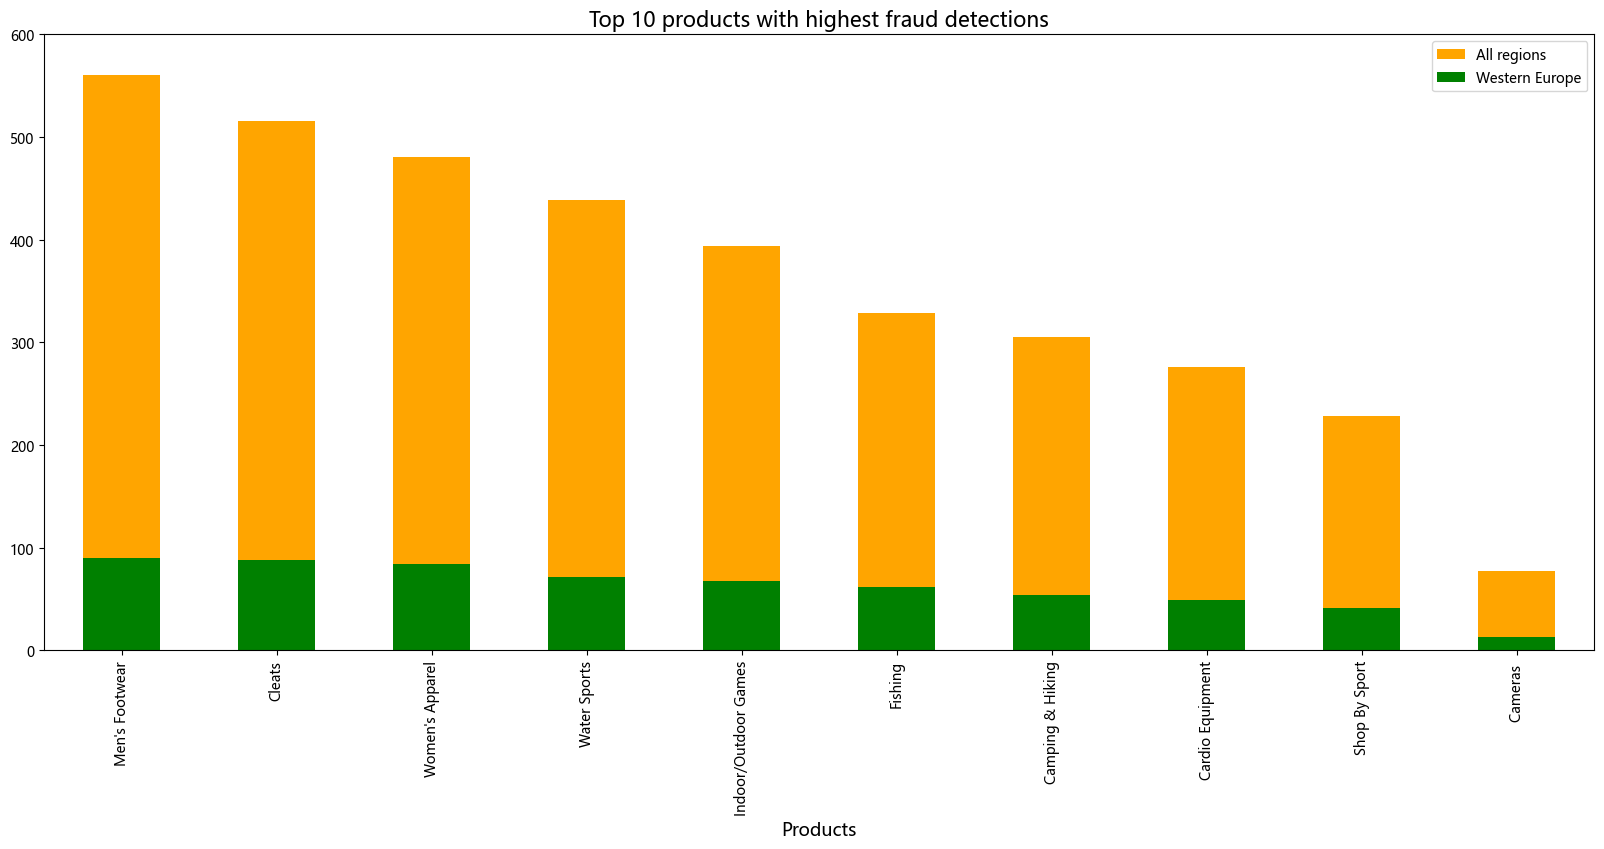

In [24]:
high_fraud1 = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 
high_fraud2 = data[(data['Order Status'] == 'SUSPECTED_FRAUD') &(data['Order Region'] == 'Western Europe')]
fraud1=high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='orange')
fraud2=high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='green')
plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()

It is very suprising to see that cleats department is being suspected to fraud the most followed by Men's footwear in all the regions and also in Western Europe.

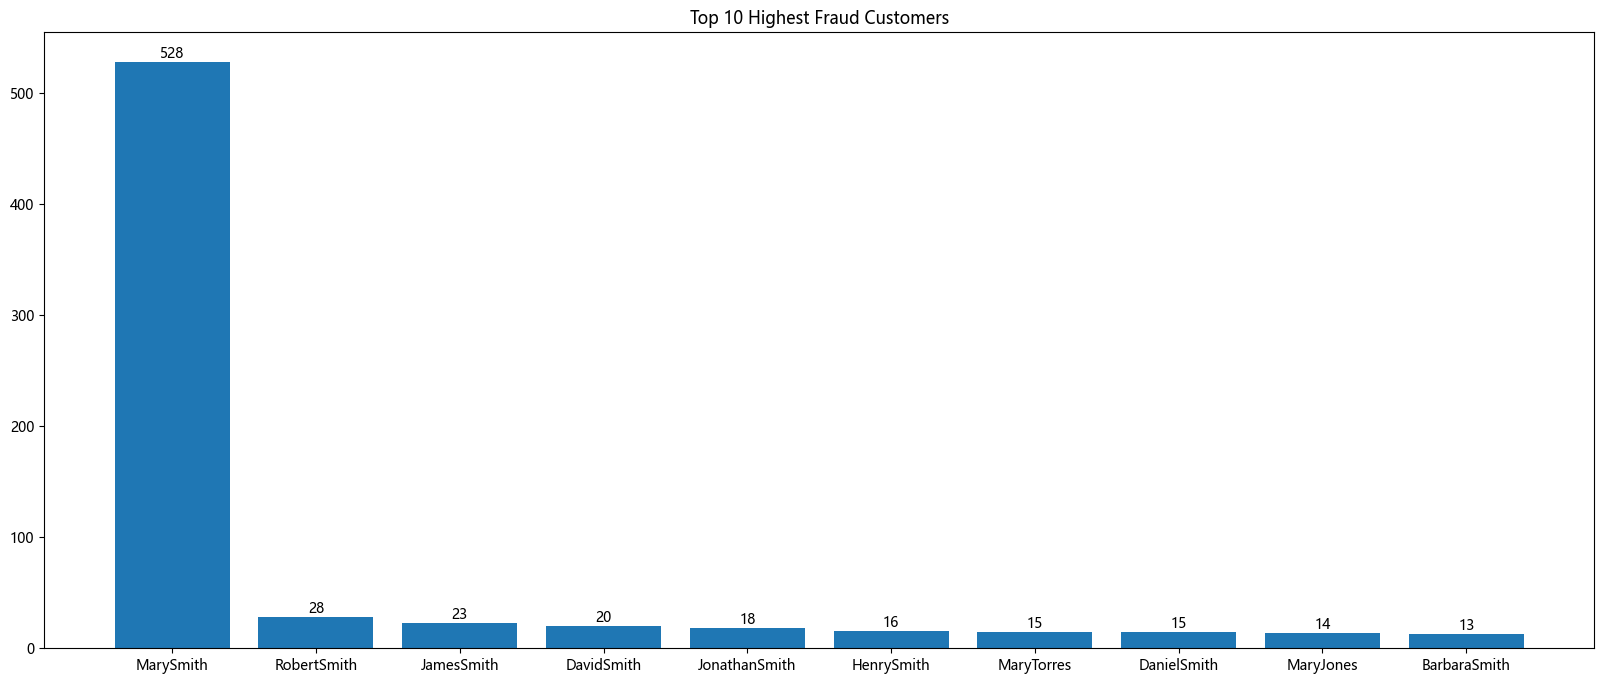

In [25]:
cus = data[(data['Order Status'] == 'SUSPECTED_FRAUD')]
top_10_customers = cus['Customer Full Name'].value_counts().nlargest(10)

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(top_10_customers.index, top_10_customers.values)

for i in range(len(top_10_customers)):
    ax.annotate(f"{top_10_customers.values[i]}", (top_10_customers.index[i], top_10_customers.values[i]), ha="center", va="bottom")

ax.set_title("Top 10 Highest Fraud Customers")

plt.show()

In [26]:
amount = data[(data['Customer Full Name'] == 'MarySmith')&(data['Order Status'] == 'SUSPECTED_FRAUD')]

amount['Sales'].sum().round(2)

102491.66

The customer named Mary Smith alone was responible for trying to conduct fraud 528 times.and total amount was almost 102k which is very huge amount.

Delivering products to customer on time without late delivery is another important aspect for a supply chain company because customers will not be satisfied if products are not delivered on time. 

<Axes: title={'center': 'Top 10 products with most late deliveries'}, xlabel='Category Name'>

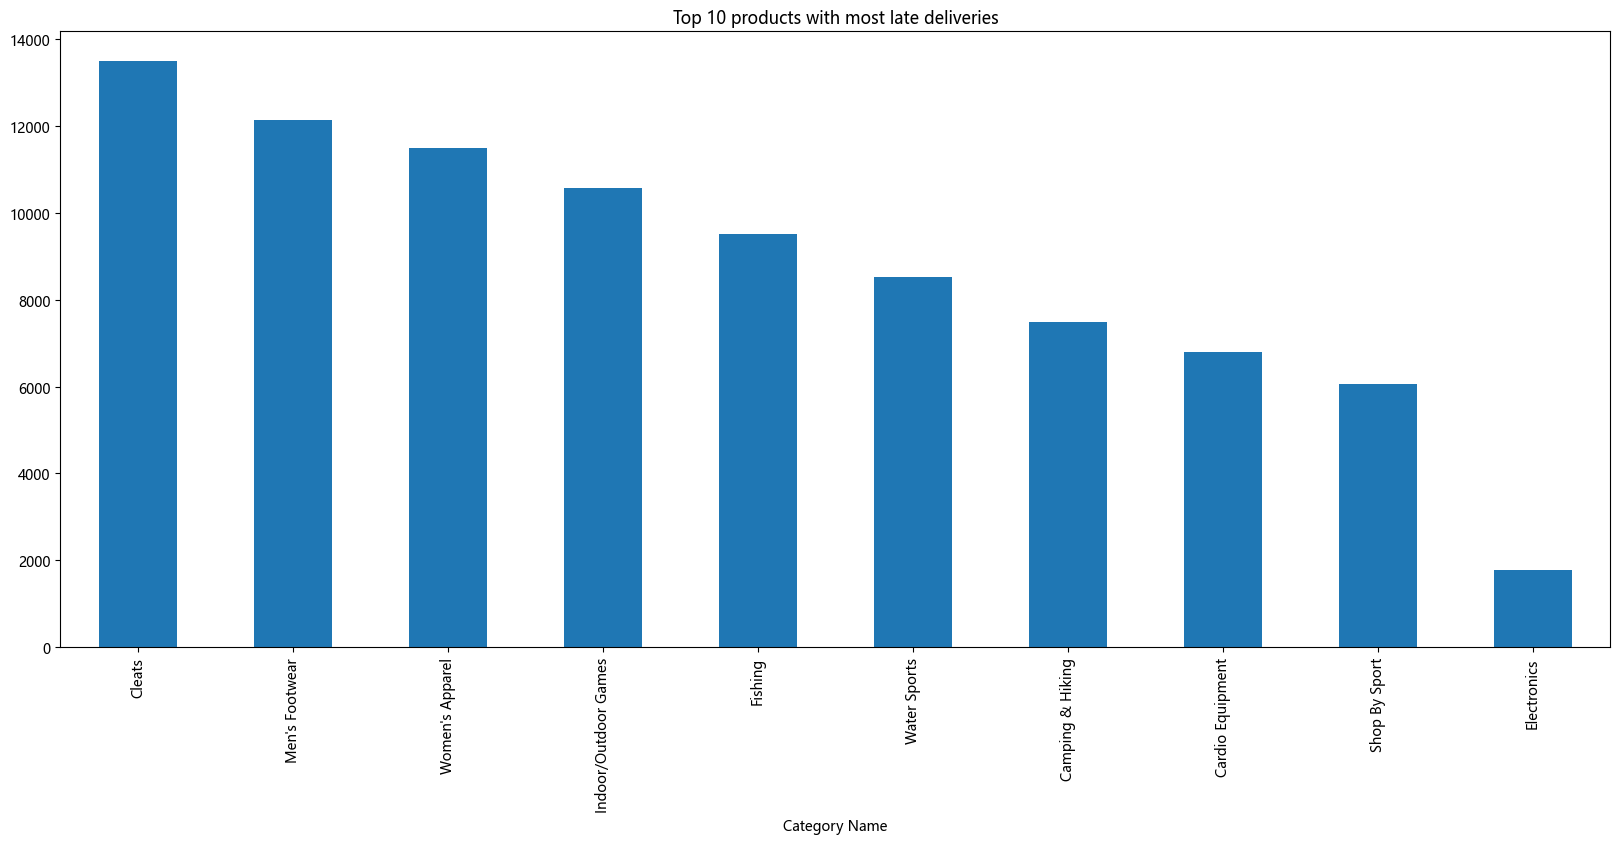

In [27]:

late_delivery = data[(data['Delivery Status'] == 'Late delivery')]

late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")


It can be seen that orders with Cleats department is getting delayed the most followed by Men's Footwear.For some orders risk of late delivery is given in data.  

The products with late delivery risk are compared with late delivered products. 

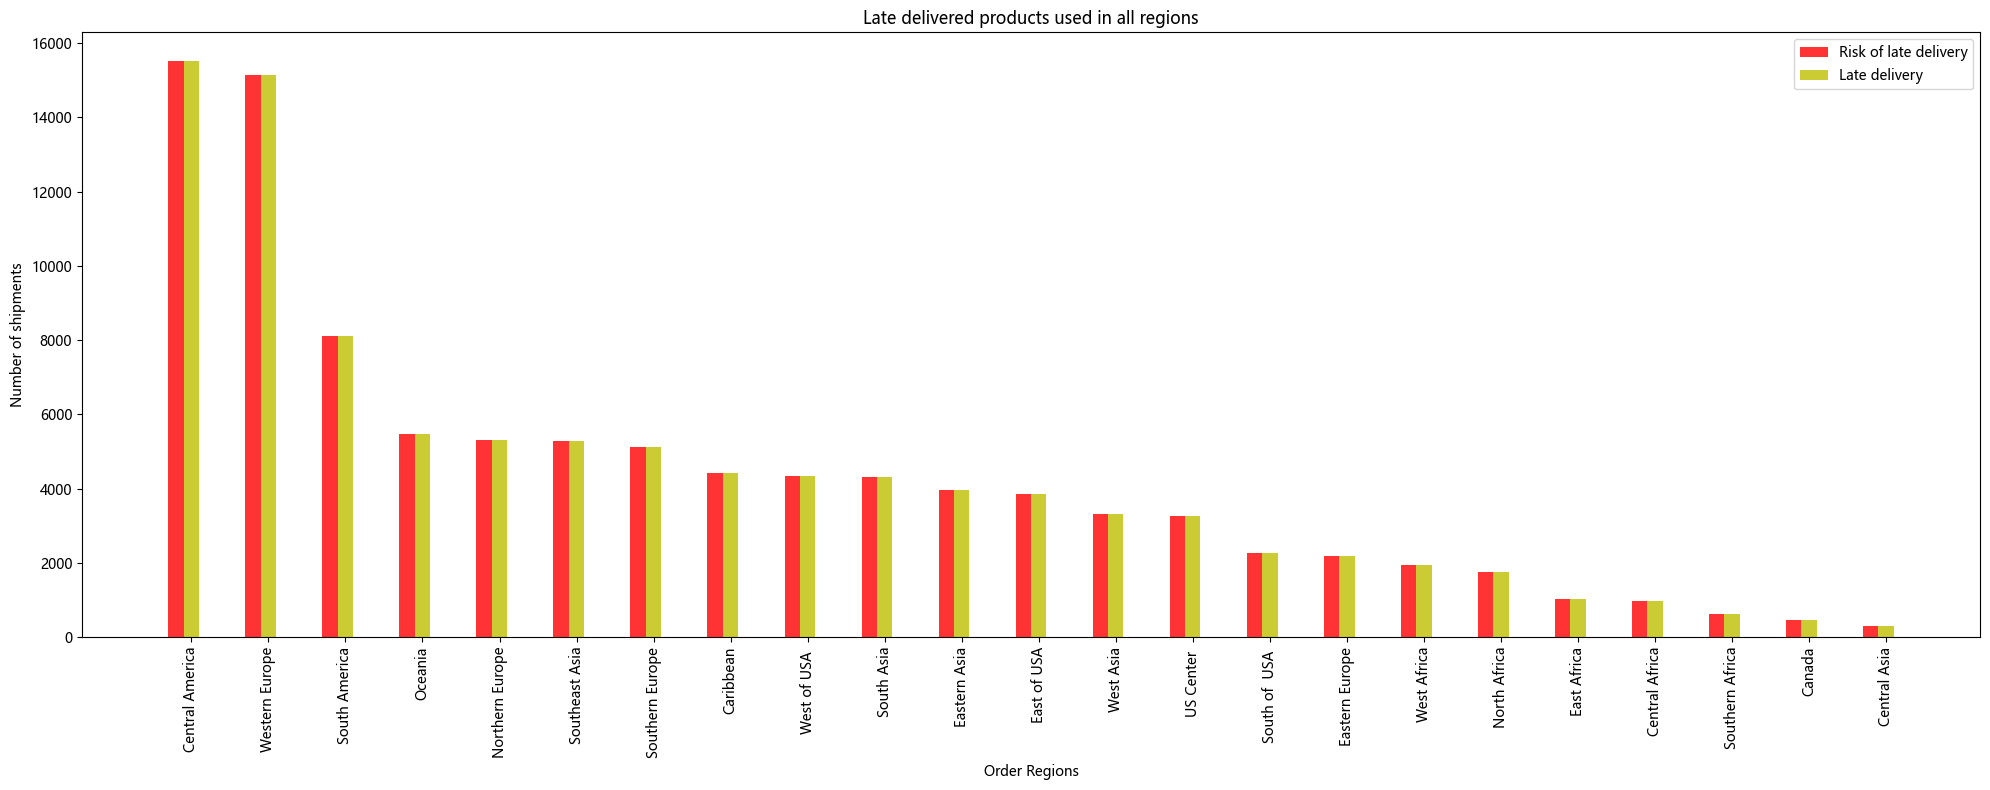

In [28]:
xyz1 = data[(data['Late_delivery_risk'] == 1)]
xyz2 = data[(data['Delivery Status'] == 'Late delivery')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8)) #Figure size
index=np.arange(n_groups)
bar_width=0.2
opacity=0.8
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='r',label='Risk of late delivery')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='y',label='Late delivery')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Late delivered products used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()


Thus,it can be concluded that for all the products with late delivery risk irrespective of region the product is actually being delivered late,to avoid late delivery the company can ship products faster using better shipping method or schedule more time of Days for shipment so customers will know in advance when the products will reach them. It will be interesting to see the number of late deliveried orders for different types of shipment method in all regions.

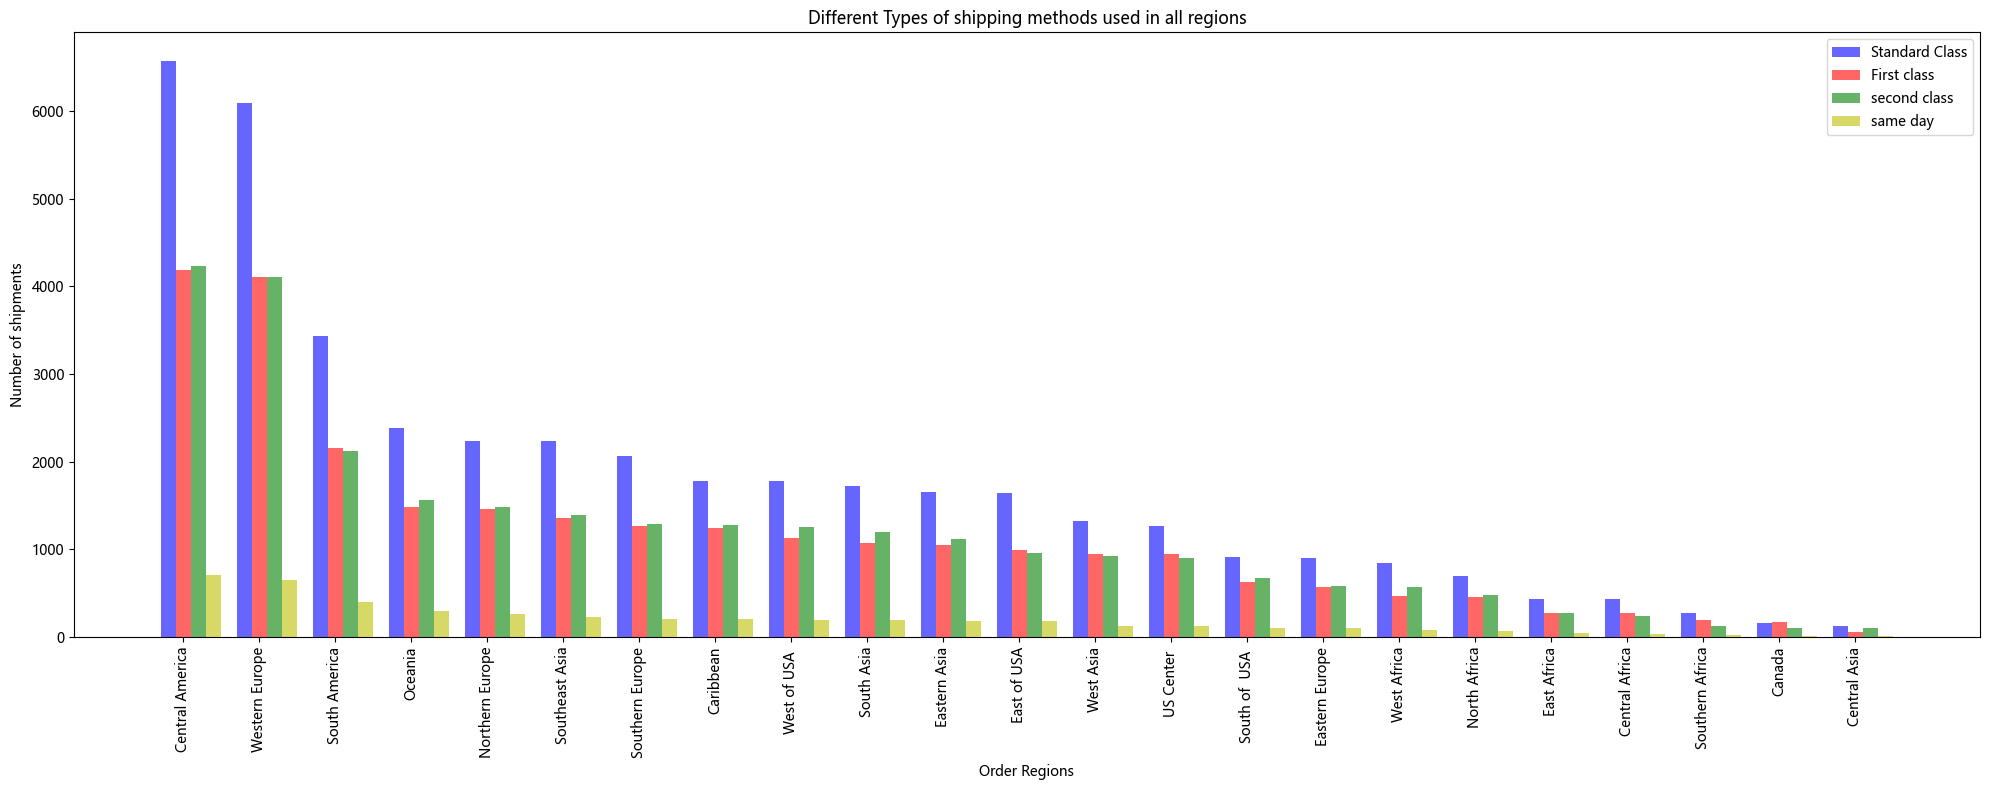

In [29]:
xyz1 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Standard Class')]
xyz2 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'First Class')]
xyz3 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Second Class')]
xyz4 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Same Day')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Standard Class')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='First class')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='second class')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='same day')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Different Types of shipping methods used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

As expected the most number of late deliveries  for all regions occured with standard class shipping,with same day shipping being the one with least number of late deliveries.Both the first class and second class shipping have almost equal number of late deliveries.

# Customer Segmentation

Understanding customer needs and targeting specific clusters of customers based on their need is one way for a supply chain company to increase number of customers and also to gain more profits.Since,purchase history of customers is already avaialble in the dataset, it can use RFM analysis for customer segmention. 

In [30]:
#Calculating total price 
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Product Price']

In [31]:
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['order date (DateOrders)'].max() # Calculating when the last order come to check recency

Timestamp('2018-01-31 23:38:00')

The last order in the dataset was made on 2018-01-31. So the present time is set slightly above than the last order time for more accuracy of recency value.

In [32]:
present = dt.datetime(2018,2,1)
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

In [33]:
Customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days, 'Order Id': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})

Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)

Customer_seg.rename(columns={'order date (DateOrders)': 'R_Value', 
                         'Order Id': 'F_Value', 
                         'TotalPrice': 'M_Value'}, inplace=True)
Customer_seg.head()

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,499.949989
2,136,10,1819.730042
3,229,18,3537.680090
4,380,14,1719.630032
5,457,7,1274.750034


R_Value(Recency) indicates how much time elapsed since a customer last order.

F_Value(Frequency) indicates how many times a customer ordered.

M_Value(Monetary) tells us how much a customer has spent purchasing items.

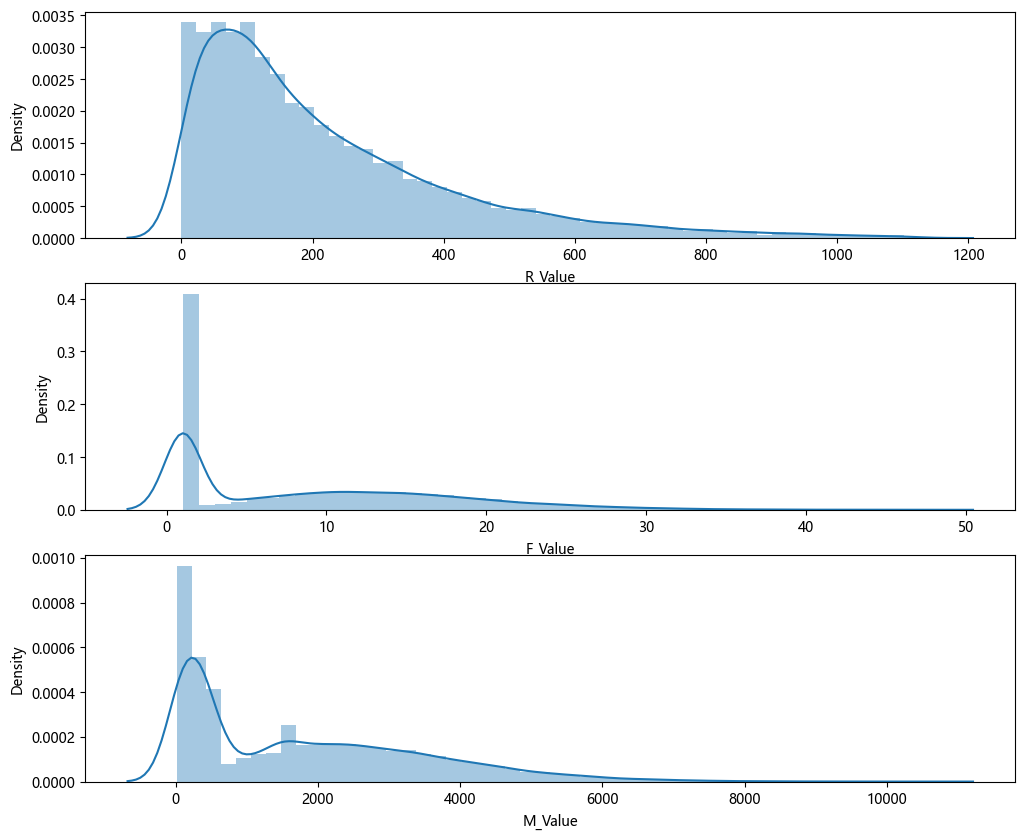

In [34]:
plt.figure(figsize=(12,10)) 
plt.subplot(3, 1, 1)
sns.distplot(Customer_seg['R_Value'])
plt.subplot(3, 1, 2) 
sns.distplot(Customer_seg['F_Value'])
plt.subplot(3, 1, 3)
sns.distplot(Customer_seg['M_Value'])
plt.show()

In [35]:
quantiles = Customer_seg.quantile(q=[0.25,0.5,0.75]) #Dividing RFM data into four quartiles
quantiles = quantiles.to_dict() 

The total data is divided into 4 quantiles. The R_Value should be low because it indicates recent customer activity and F_value, M_Value should be high since they indicate frequency and total value of purchase. 

In [36]:
# R_Score should be minimum .
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4
# The higher the F_Score,M_Score the better.    
def FM_Score(x,y,z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]: 
        return 2
    else:
        return 1

In [37]:
Customer_seg['R_Score'] = Customer_seg['R_Value'].apply(R_Score, args=('R_Value',quantiles))
Customer_seg['F_Score'] = Customer_seg['F_Value'].apply(FM_Score, args=('F_Value',quantiles))
Customer_seg['M_Score'] = Customer_seg['M_Value'].apply(FM_Score, args=('M_Value',quantiles))
Customer_seg['RFM_Score'] = Customer_seg.R_Score.astype(str)+ Customer_seg.F_Score.astype(str) + Customer_seg.M_Score.astype(str)
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score
Order Customer Id,,,,,,,
1,792,1,499.949989,4,4,3,443
2,136,10,1819.730042,2,2,2,222
3,229,18,3537.680090,3,1,1,311
4,380,14,1719.630032,4,2,2,422
5,457,7,1274.750034,4,3,3,433


After finding the individual scores of R, F, and M, stratify the scores. Those in columns F and M that are greater than or equal to the mean are in the first grade and are represented by the number 1, and those that are less than the average are in the first grade and are represented by the number 0. When scoring, the smaller value of R is already counted as a high score, so the gear rules here are It is the opposite of the mean method.

In [38]:
Customer_seg['R_Score_Level'] = np.where(Customer_seg['R_Score'] <= Customer_seg['R_Score'].mean(), 1, 0)
Customer_seg['F_Score_Level'] = np.where(Customer_seg['F_Score'] >= Customer_seg['F_Score'].mean(), 1, 0)
Customer_seg['M_Score_Level'] = np.where(Customer_seg['M_Score'] >= Customer_seg['M_Score'].mean(), 1, 0)
Customer_seg['RFM_Score_Level'] = Customer_seg.R_Score_Level.astype(str)+ Customer_seg.F_Score_Level.astype(str) + Customer_seg.M_Score_Level.astype(str)
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,R_Score_Level,F_Score_Level,M_Score_Level,RFM_Score_Level
Order Customer Id,,,,,,,,,,,
1,792,1,499.949989,4,4,3,443,0,1,1,011
2,136,10,1819.730042,2,2,2,222,1,0,0,100
3,229,18,3537.680090,3,1,1,311,0,0,0,000
4,380,14,1719.630032,4,2,2,422,0,0,0,000
5,457,7,1274.750034,4,3,3,433,0,1,1,011


How many different customer segments are there in total can be found.

In [39]:
count=Customer_seg['RFM_Score_Level'].unique()
print(count)
len(count)

['011' '100' '000' '001' '010' '111' '101' '110']


8

There are 8 values in total for customer segmentation.Appropriate names were assigned for each value seperately.

In [40]:
def RFM_Total_Score_Level(df):

    if (df['RFM_Score_Level'] == '111'):
        return 'Important Value Customers' 
    elif (df['RFM_Score_Level'] == '101'):
        return 'Important Development Customers' 
    elif (df['RFM_Score_Level'] == '011'): 
        return 'Important Keeping Customers'
    elif (df['RFM_Score_Level'] == '001'): 
         return 'Important Retain Customers'
    elif (df['RFM_Score_Level'] == '110'): 
        return 'General Value Customers'
    elif (df['RFM_Score_Level'] == '100'): 
        return 'General Development Customers'
    elif (df['RFM_Score_Level'] == '010'): 
        return 'General Keeping Customers'
    else:                               
        return 'General Retain Customers'

Customer_seg['Customer_Segmentation'] =Customer_seg.apply(RFM_Total_Score_Level, axis=1)
Customer_seg.head()


,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,R_Score_Level,F_Score_Level,M_Score_Level,RFM_Score_Level,Customer_Segmentation
Order Customer Id,,,,,,,,,,,,
1,792,1,499.949989,4,4,3,443,0,1,1,011,Important Keeping Customers
2,136,10,1819.730042,2,2,2,222,1,0,0,100,General Development Customers
3,229,18,3537.680090,3,1,1,311,0,0,0,000,General Retain Customers
4,380,14,1719.630032,4,2,2,422,0,0,0,000,General Retain Customers
5,457,7,1274.750034,4,3,3,433,0,1,1,011,Important Keeping Customers


How many customers are present in each segment?

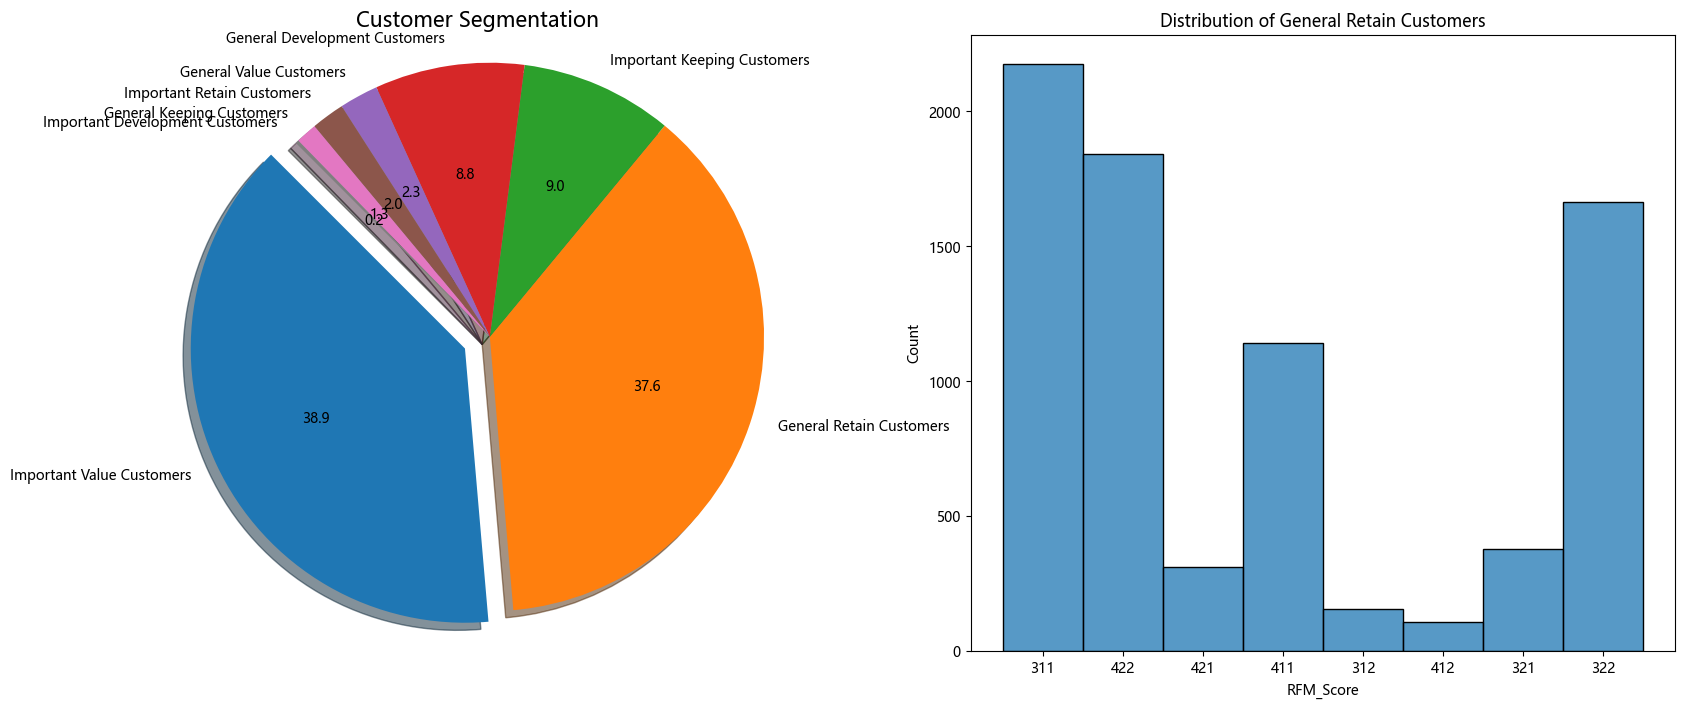

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

Customer_seg['Customer_Segmentation'].value_counts().plot.pie(ax=ax1,
                                        startangle=135, explode=(0.1,0,0,0,0,0,0,0),autopct='%.1f',shadow=True)
ax1.set_title("Customer Segmentation",size=15)
ax1.set_ylabel(" ")
ax1.axis('equal') 

churned=Customer_seg[(Customer_seg['RFM_Score_Level']=='000')]
sns.histplot(churned['RFM_Score'], bins=10, ax=ax2)
ax2.set_xlabel('RFM_Score')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of General Retain Customers')

plt.show()

Since total customers are divided into 9 segments it can be seen that, 11.4% customers are at risk of losing them as customers and 11% customers needs attention else even they will be lost eventually.It can be seen that 4.4% of customers are already lost. 

The top 4 customers in terms of customer volume are Important Value Customers, Important Keeping Customers, General Development Customers, and General Retention Customers. For this type of customers, the following actions can be taken:
- Important Value Customers (38.9%): This type of customer is the most valuable customer. Their recent consumption time is recent, their consumption frequency is high, and their consumption amount is high. For this type of customers, VIP services should be provided, such as priority delivery, exclusive customer service, customized products, etc., to maintain their high activity and consumption levels. At the same time, you can increase their stickiness and loyalty through points redemption, membership cards, coupons, etc.
- Important Keeping Customers (9.0%): This type of customer is a loyal customer who has not consumed money for a period of time. They have high consumption frequency and high consumption amount, but their recent consumption time is far away. For this type of customers, we should proactively keep in touch with them, understand their needs and feedback, and provide satisfactory after-sales service and problem solutions. At the same time, you can stimulate their willingness to purchase again by sending new product recommendations, event invitations, holiday greetings, etc.
- General Development Customers (8.8%): This type of customer is a potential customer. Their recent consumption time is recent, but the consumption frequency is low and the consumption amount is low. For this type of customers, we should improve their awareness and trust, and increase their purchasing confidence by displaying product advantages, reviews, cases, etc. At the same time, their purchase costs and risks can be reduced through free samples, trial periods, discounts, etc.
- General Retention Customers (37.6%): This type of customer is about to be lost. Their recent consumption is far away, the frequency of consumption is low, and the amount of consumption is low. For this type of customers, you should proactively contact them to investigate their satisfaction and reasons for churn, and provide corresponding remedial measures according to the situation. At the same time, you can express care and attention by sending thank you letters, greetings, and return phone calls.

# Data Modelling

To measure the performance of different models the machine learning models are trained to detect fraud,late delivery for classification type.   

A new dataset is created with the copy of original data for training the data and validation.

In [42]:
train_data=data.copy()

Two new columns are created for orders with suspected fraud and late delivery making them into binary classification, which in turn helps to measure performance of different models better.

In [43]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)

Now to measure machine models accurately all the columns with repeated values are dropped like late_delivery_risk column because, it is known all the products with late delivery risk are delivered late. And Order Status column because, a new column for fraud detection is created there is a chance machine learning model might take values directly from these columns to predict output.

In [44]:
train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order_month_year','order date (DateOrders)'], axis=1, inplace=True)

It is important to check the type of variables in the data because machine learning models can only be trained with numerical values.

In [45]:
train_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

There are some columns with object type data which cannot be trained in machine learning models so all the object type data is converted to int type using preprocessing label encoder library.

In [46]:
le = preprocessing.LabelEncoder()
train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])


train_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,TotalPrice,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,...,327.75,3,1876,2018,1,2,22,327.75,0,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,...,327.75,3,5378,2018,1,5,12,327.75,0,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,...,327.75,3,4429,2018,1,5,12,327.75,0,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,...,327.75,3,12929,2018,1,5,11,327.75,0,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,...,327.75,3,10638,2018,1,5,11,327.75,0,0


Now all the data is transformed into int type. The dataset is split into train data and test data so model can be trained with train data and the performance of model can be evaluated using test data.

## Comparision of Classification Models

In [47]:
xf=train_data.loc[:, train_data.columns != 'fraud']

yf=train_data['fraud']
#Splitting the data into two parts
xf_train, xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size = 0.2,random_state = 42)

xl=train_data.loc[:, train_data.columns != 'late_delivery']

yl=train_data['late_delivery']
#Splitting the data into two parts
xl_train, xl_test,yl_train,yl_test = train_test_split(xl,yl,test_size = 0.2, random_state = 42)

Since there are so many different variables with different ranges standard scaler is used to standardize total the data so it is internally consistent before training the data with machine learning.

In [48]:
sc = StandardScaler()
xf_train=sc.fit_transform(xf_train)
xf_test=sc.transform(xf_test)
xl_train=sc.fit_transform(xl_train)
xl_test=sc.transform(xl_test)

The data is now ready to be used in machine learning models since many different models are compared training every model from begining is complicated so a function is defined to make the process bit easy. The output is in binary classification format so all the models are measured with Accuracy score,recall score and F1 score metrics. 

To measure the performance of different models F1 score is used as the main metric because it is the harmonic mean of precison score and recall score.And all the scores are multiplied with 100 for better understanding

In [49]:
def classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test):
    model_f=model_f.fit(xf_train,yf_train) # Fitting train data for fraud detection
    model_l=model_l.fit(xl_train,yl_train) # Fitting train data for predection of late delivery
    yf_pred=model_f.predict(xf_test)
    yl_pred=model_l.predict(xl_test)  
    accuracy_f=accuracy_score(yf_pred, yf_test) #Accuracy for fraud detection
    accuracy_l=accuracy_score(yl_pred, yl_test) #Accuracy for predection of late delivery
    recall_f=recall_score(yf_pred, yf_test) #Recall score for  fraud detection
    recall_l=recall_score(yl_pred, yl_test)# Recall score for predection of late delivery
    conf_f=confusion_matrix(yf_test, yf_pred)# fraud detection
    conf_l=confusion_matrix(yl_test, yl_pred)#predection of late delivery
    f1_f=f1_score(yf_test, yf_pred)#fraud detection
    f1_l=f1_score(yl_test, yl_pred)#predection of late delivery
    print('Model paramters used are :',model_f)
    print('Accuracy of fraud status is               :', '{:.2%}'.format(accuracy_f))
    print('Recall score of fraud status is           :', '{:.2%}'.format(recall_f))
    print('Conf Matrix of fraud status is            :\n',  (conf_f))
    print('F1 score of fraud status is               :', '{:.2%}'.format(f1_f))
    print('Accuracy of late delivery status is       :', '{:.2%}'.format(accuracy_l))
    print('Recall score of late delivery status is   :', '{:.2%}'.format(recall_l))
    print('Conf Matrix of late delivery status is    : \n',(conf_l))
    print('F1 score of late delivery status is       :', '{:.2%}'.format(f1_l))
    return model_f,accuracy_f,recall_f,f1_f,accuracy_l,recall_l,f1_l

### Logistic classification model

In [50]:
ModelEvaluation=[]
model_f = LogisticRegression(solver='lbfgs',random_state=0) 
model_l = LogisticRegression(solver='lbfgs',random_state=0) 

model_f,accuracy_f,recall_f,f1_f,accuracy_l,recall_l,f1_l=classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)
ModelEvaluation.append([model_f,'{:.2%}'.format(accuracy_f),'{:.2%}'.format(recall_f),'{:.2%}'.format(f1_f),'{:.2%}'.format(accuracy_l),'{:.2%}'.format(recall_l),'{:.2%}'.format(f1_l)])

Model paramters used are : LogisticRegression(random_state=0)
Accuracy of fraud status is               : 97.78%
Recall score of fraud status is           : 58.12%
Conf Matrix of fraud status is            :
 [[35125   129]
 [  671   179]]
F1 score of fraud status is               : 30.92%
Accuracy of late delivery status is       : 98.85%
Recall score of late delivery status is   : 97.94%
Conf Matrix of late delivery status is    : 
 [[15891   416]
 [    0 19797]]
F1 score of late delivery status is       : 98.96%


### Gaussian naive bayes model

In [51]:
model_f = GaussianNB()
model_l = GaussianNB()

model_f,accuracy_f,recall_f,f1_f,accuracy_l,recall_l,f1_l=classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)
ModelEvaluation.append([model_f,'{:.2%}'.format(accuracy_f),'{:.2%}'.format(recall_f),'{:.2%}'.format(f1_f),'{:.2%}'.format(accuracy_l),'{:.2%}'.format(recall_l),'{:.2%}'.format(f1_l)])

Model paramters used are : GaussianNB()
Accuracy of fraud status is               : 87.85%
Recall score of fraud status is           : 16.23%
Conf Matrix of fraud status is            :
 [[30867  4387]
 [    0   850]]
F1 score of fraud status is               : 27.93%
Accuracy of late delivery status is       : 57.23%
Recall score of late delivery status is   : 56.19%
Conf Matrix of late delivery status is    : 
 [[  888 15419]
 [   21 19776]]
F1 score of late delivery status is       : 71.92%


### Support vector machines

In [52]:
model_f = svm.LinearSVC()
model_l = svm.LinearSVC()

model_f,accuracy_f,recall_f,f1_f,accuracy_l,recall_l,f1_l=classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)
ModelEvaluation.append([model_f,'{:.2%}'.format(accuracy_f),'{:.2%}'.format(recall_f),'{:.2%}'.format(f1_f),'{:.2%}'.format(accuracy_l),'{:.2%}'.format(recall_l),'{:.2%}'.format(f1_l)])

Model paramters used are : LinearSVC()
Accuracy of fraud status is               : 97.76%
Recall score of fraud status is           : 57.24%
Conf Matrix of fraud status is            :
 [[35130   124]
 [  684   166]]
F1 score of fraud status is               : 29.12%
Accuracy of late delivery status is       : 98.85%
Recall score of late delivery status is   : 97.94%
Conf Matrix of late delivery status is    : 
 [[15891   416]
 [    0 19797]]
F1 score of late delivery status is       : 98.96%


### K nearest Neighbors classification

In [53]:
model_f = KNeighborsClassifier(n_neighbors=1)
model_l = KNeighborsClassifier(n_neighbors=1)

model_f,accuracy_f,recall_f,f1_f,accuracy_l,recall_l,f1_l=classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)
ModelEvaluation.append([model_f,'{:.2%}'.format(accuracy_f),'{:.2%}'.format(recall_f),'{:.2%}'.format(f1_f),'{:.2%}'.format(accuracy_l),'{:.2%}'.format(recall_l),'{:.2%}'.format(f1_l)])

Model paramters used are : KNeighborsClassifier(n_neighbors=1)
Accuracy of fraud status is               : 97.39%
Recall score of fraud status is           : 42.72%
Conf Matrix of fraud status is            :
 [[34888   366]
 [  577   273]]
F1 score of fraud status is               : 36.67%
Accuracy of late delivery status is       : 80.71%
Recall score of late delivery status is   : 83.27%
Conf Matrix of late delivery status is    : 
 [[13080  3227]
 [ 3737 16060]]
F1 score of late delivery status is       : 82.18%


### Linear Discriminant Analysis

In [54]:
model_f = LinearDiscriminantAnalysis()
model_l = LinearDiscriminantAnalysis()

model_f,accuracy_f,recall_f,f1_f,accuracy_l,recall_l,f1_l=classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)
ModelEvaluation.append([model_f,'{:.2%}'.format(accuracy_f),'{:.2%}'.format(recall_f),'{:.2%}'.format(f1_f),'{:.2%}'.format(accuracy_l),'{:.2%}'.format(recall_l),'{:.2%}'.format(f1_l)])

Model paramters used are : LinearDiscriminantAnalysis()
Accuracy of fraud status is               : 97.88%
Recall score of fraud status is           : 56.50%
Conf Matrix of fraud status is            :
 [[34966   288]
 [  476   374]]
F1 score of fraud status is               : 49.47%
Accuracy of late delivery status is       : 98.36%
Recall score of late delivery status is   : 97.69%
Conf Matrix of late delivery status is    : 
 [[15841   466]
 [  125 19672]]
F1 score of late delivery status is       : 98.52%


### Random forest classification

In [55]:
model_f = RandomForestClassifier()
model_l = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

model_f,accuracy_f,recall_f,f1_f,accuracy_l,recall_l,f1_l=classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)
ModelEvaluation.append([model_f,'{:.2%}'.format(accuracy_f),'{:.2%}'.format(recall_f),'{:.2%}'.format(f1_f),'{:.2%}'.format(accuracy_l),'{:.2%}'.format(recall_l),'{:.2%}'.format(f1_l)])

Model paramters used are : RandomForestClassifier()
Accuracy of fraud status is               : 98.71%
Recall score of fraud status is           : 98.48%
Conf Matrix of fraud status is            :
 [[35248     6]
 [  460   390]]
F1 score of fraud status is               : 62.60%
Accuracy of late delivery status is       : 98.64%
Recall score of late delivery status is   : 97.58%
Conf Matrix of late delivery status is    : 
 [[15817   490]
 [    0 19797]]
F1 score of late delivery status is       : 98.78%


### Extra trees classification

In [56]:
model_f = ExtraTreesClassifier(n_estimators=100, max_depth=None,random_state=0)
model_l = ExtraTreesClassifier(n_estimators=100, max_depth=None,random_state=0)

model_f,accuracy_f,recall_f,f1_f,accuracy_l,recall_l,f1_l=classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)
ModelEvaluation.append([model_f,'{:.2%}'.format(accuracy_f),'{:.2%}'.format(recall_f),'{:.2%}'.format(f1_f),'{:.2%}'.format(accuracy_l),'{:.2%}'.format(recall_l),'{:.2%}'.format(f1_l)])

Model paramters used are : ExtraTreesClassifier(random_state=0)
Accuracy of fraud status is               : 98.66%
Recall score of fraud status is           : 99.46%
Conf Matrix of fraud status is            :
 [[35252     2]
 [  482   368]]
F1 score of fraud status is               : 60.33%
Accuracy of late delivery status is       : 99.15%
Recall score of late delivery status is   : 98.47%
Conf Matrix of late delivery status is    : 
 [[15999   308]
 [    0 19797]]
F1 score of late delivery status is       : 99.23%


### Decision tree classification

In [57]:
model_f = tree.DecisionTreeClassifier()
model_l = tree.DecisionTreeClassifier()

model_f,accuracy_f,recall_f,f1_f,accuracy_l,recall_l,f1_l=classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)
ModelEvaluation.append([model_f,'{:.2%}'.format(accuracy_f),'{:.2%}'.format(recall_f),'{:.2%}'.format(f1_f),'{:.2%}'.format(accuracy_l),'{:.2%}'.format(recall_l),'{:.2%}'.format(f1_l)])

Model paramters used are : DecisionTreeClassifier()
Accuracy of fraud status is               : 99.09%
Recall score of fraud status is           : 81.67%
Conf Matrix of fraud status is            :
 [[35103   151]
 [  177   673]]
F1 score of fraud status is               : 80.41%
Accuracy of late delivery status is       : 99.44%
Recall score of late delivery status is   : 99.46%
Conf Matrix of late delivery status is    : 
 [[16200   107]
 [   94 19703]]
F1 score of late delivery status is       : 99.49%


### Comparision Table for Classification Scores

In [58]:
classification_comparision=pd.DataFrame(ModelEvaluation,columns = ['Model name','Accuracy Score for Fraud Detection','Recall Score for Fraud Detection','F1 Score for Fraud Detection',
                                                                           'Accuracy Score for Late Delivery','Recall Score for Late Delivery','F1 Score for Late Delivery'])
classification_comparision['Model name']=['Logistic','Gausian Naive bayes','Support Vector Machines','K nearest Neighbour','Linear Discriminant Analysis','Random Forest','Extra trees','Decision tree']

classification_comparision

,Model name,Accuracy Score for Fraud Detection,Recall Score for Fraud Detection,F1 Score for Fraud Detection,Accuracy Score for Late Delivery,Recall Score for Late Delivery,F1 Score for Late Delivery
0,Logistic,97.78%,58.12%,30.92%,98.85%,97.94%,98.96%
1,Gausian Naive bayes,87.85%,16.23%,27.93%,57.23%,56.19%,71.92%
2,Support Vector Machines,97.76%,57.24%,29.12%,98.85%,97.94%,98.96%
3,K nearest Neighbour,97.39%,42.72%,36.67%,80.71%,83.27%,82.18%
4,Linear Discriminant Analysis,97.88%,56.50%,49.47%,98.36%,97.69%,98.52%
5,Random Forest,98.71%,98.48%,62.60%,98.64%,97.58%,98.78%
6,Extra trees,98.66%,99.46%,60.33%,99.15%,98.47%,99.23%
7,Decision tree,99.09%,81.67%,80.41%,99.44%,99.46%,99.49%


It is obvious that the Decision tree performs better for the classification type, with an F1 score of almost 80% for fraud detection and 99% for late delivery discrimination.

### Cross validation

In [59]:
def cross_validation_model(model_f,model_l,xf,yf,xl,yl):
    model_f= model_f.fit(xf,yf)
    model_l = model_l.fit(xl,yl)
    scores_f = cross_val_score(model_f, xf, yf, cv=6)
    scores_l = cross_val_score(model_l, xl, yl, cv=6)
    print('Model used is',model_f)
    print('Cross validation accuracy of fraud: %0.2f (+/- %0.2f)' % (scores_f.mean(), scores_f.std() * 2))
    print('Cross validation accuracy of late : %0.2f (+/- %0.2f)' % (scores_l.mean(), scores_l.std() * 2))

In [60]:
cross_validation_model(model_f,model_l,xf,yf,xl,yl)

Model used is DecisionTreeClassifier()
Cross validation accuracy of fraud: 0.96 (+/- 0.05)
Cross validation accuracy of late : 0.98 (+/- 0.02)


Since, the difference between cross validated scores and accuracy scores of the model is very minimal it can be confirmed that the data is neither overfitted or underfitted, Which variable was given more importance in the model is found using feature importance method from sklearn.

### Feature Importance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Days for shipping (real)'),
  Text(1, 0, 'late_delivery'),
  Text(2, 0, 'Shipping Mode'),
  Text(3, 0, 'Customer Full Name'),
  Text(4, 0, 'Type'),
  Text(5, 0, 'Order City'),
  Text(6, 0, 'Order State'),
  Text(7, 0, 'Order Id'),
  Text(8, 0, 'order_hour'),
  Text(9, 0, 'Customer Zipcode'),
  Text(10, 0, 'Order Customer Id'),
  Text(11, 0, 'Customer City'),
  Text(12, 0, 'Order Country'),
  Text(13, 0, 'Order Item Id'),
  Text(14, 0, 'Customer Id'),
  Text(15, 0, 'order_month'),
  Text(16, 0, 'order_week_day'),
  Text(17, 0, 'Customer State'),
  Text(18, 0, 'Order Region'),
  Text(19, 0, 'Customer Segment'),
  Text(20, 0, 'Market'),
  Text(21, 0, 'Order Item Profit Ratio'),
  Text(22, 0, 'Order Profit Per Order'),
  Text(23, 0, 'Order Item Discount'),
  Text(24, 0, 'Sales 

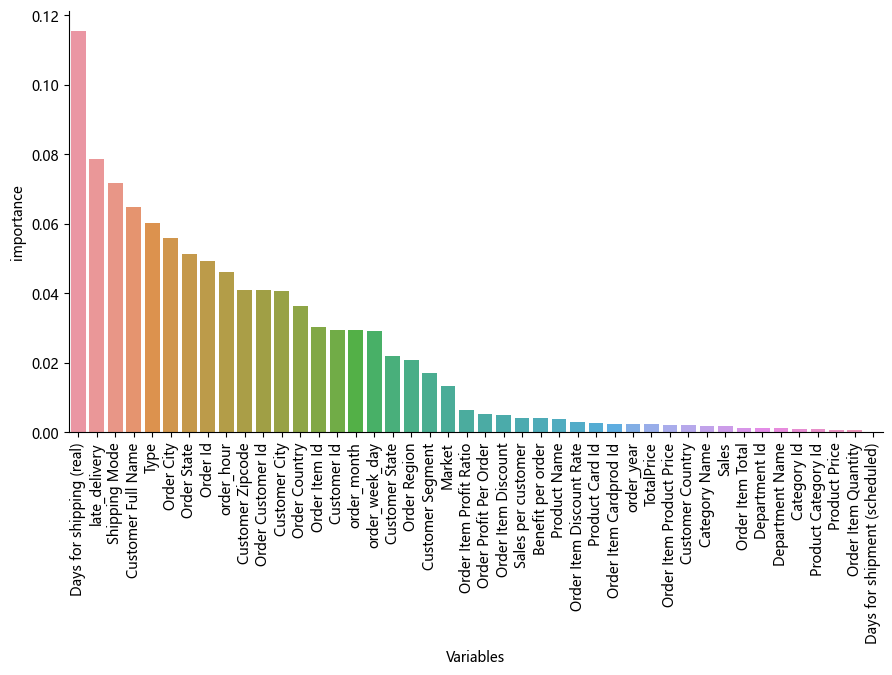

In [61]:
important_col=model_f.feature_importances_.argsort()
feat_imp=pd.DataFrame({'Variables':xf.columns[important_col],'importance':model_f.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='Variables', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

Even though fraud detection is not at all related to Days for shipping(real) it is very surprising to see it was given an importance of 0.12. All other important parameters like customer full name, shipping mode, type of payment used are given an importance of 0.7.

Same way which variables were given importance for prediction of late delivery is found.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Days for shipping (real)'),
  Text(1, 0, 'Shipping Mode'),
  Text(2, 0, 'fraud'),
  Text(3, 0, 'Days for shipment (scheduled)'),
  Text(4, 0, 'Customer Full Name'),
  Text(5, 0, 'Order City'),
  Text(6, 0, 'Order State'),
  Text(7, 0, 'order_hour'),
  Text(8, 0, 'Order Customer Id'),
  Text(9, 0, 'Type'),
  Text(10, 0, 'Customer City'),
  Text(11, 0, 'Order Item Id'),
  Text(12, 0, 'Order Country'),
  Text(13, 0, 'Customer Zipcode'),
  Text(14, 0, 'Order Id'),
  Text(15, 0, 'Customer Id'),
  Text(16, 0, 'Customer State'),
  Text(17, 0, 'order_week_day'),
  Text(18, 0, 'Order Region'),
  Text(19, 0, 'order_month'),
  Text(20, 0, 'Customer Segment'),
  Text(21, 0, 'Order Item Discount'),
  Text(22, 0, 'Order Item Profit Ratio'),
  Text(23, 0, 'Market'),
  Text(24, 0, 'Order P

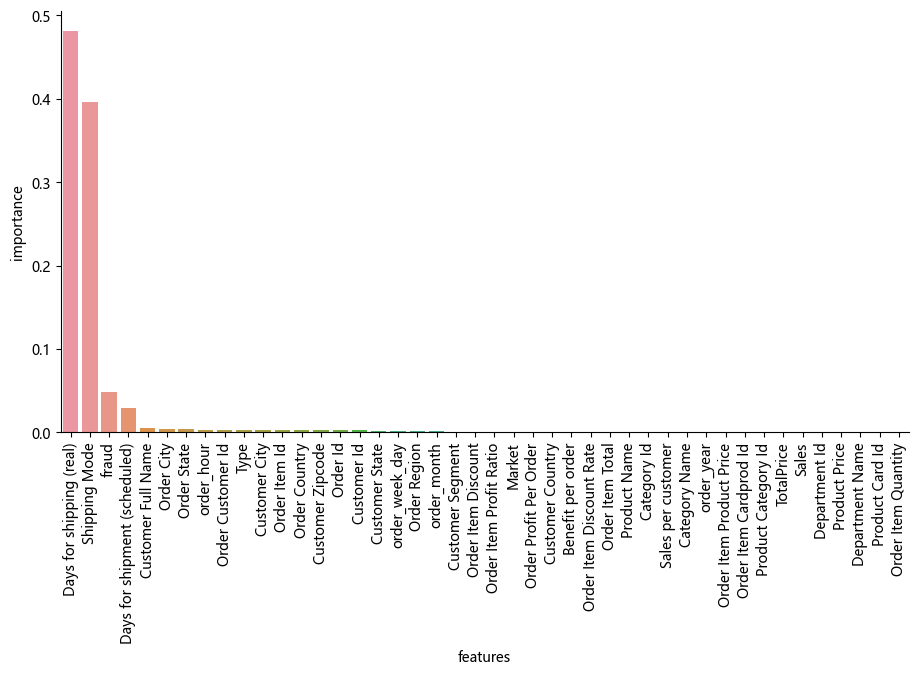

In [62]:
important_col=model_l.feature_importances_.argsort()
feat_imp=pd.DataFrame({'features':xl.columns[important_col],'importance':model_l.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='features', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

It can be seen that the columns for the days of shipping is given almost 90% importance in decision tree model,and try to see how well the model can predict when these variables are removed.

So a new model with the copy of train data is created
.

In [63]:
new_data=train_data.copy()

In [64]:
new_data=new_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)

In [65]:
new_xf=new_data.loc[:, new_data.columns != 'fraud']

new_yf=train_data['fraud']

new_xf_train, new_xf_test,new_yf_train,new_yf_test = train_test_split(new_xf,new_yf,test_size = 0.2,random_state = 42)

new_xl=new_data.loc[:, new_data.columns != 'late_delivery']

new_yl=train_data['late_delivery']

new_xl_train, new_xl_test,new_yl_train,new_yl_test = train_test_split(new_xl,new_yl,test_size = 0.2,random_state = 42)

Standardizing data with Standardscaler module:

In [66]:
new_xf_train=sc.fit_transform(new_xf_train)
new_xf_test=sc.transform(new_xf_test)
new_xl_train=sc.fit_transform(new_xl_train)
new_xl_test=sc.transform(new_xl_test)

### Decision Tree classification

In [67]:
new_model_f=tree.DecisionTreeClassifier()
new_model_l=tree.DecisionTreeClassifier()
new_model_f=new_model_f.fit(new_xf_train,new_yf_train) 
new_model_l=new_model_l.fit(new_xl_train,new_yl_train) 
yf_pred=new_model_f.predict(new_xf_test)
yl_pred=new_model_l.predict(new_xl_test)  
accuracy_f=accuracy_score(yf_pred, new_yf_test) 
accuracy_l=accuracy_score(yl_pred, new_yl_test) 
recall_f=recall_score(yf_pred, new_yf_test) 
recall_l=recall_score(yl_pred, new_yl_test)
conf_f=confusion_matrix(new_yf_test, yf_pred)
conf_l=confusion_matrix(new_yl_test, yl_pred)
f1_f=f1_score(new_yf_test, yf_pred)
f1_l=f1_score(new_yl_test, yl_pred)
print('Model paramters used are :',new_model_f)
print('Accuracy of fraud status is             :', '{:.2%}'.format(accuracy_f))
print('Recall score of fraud status is         :', '{:.2%}'.format(recall_f))
print('Conf Matrix of fraud status is          :\n',  (conf_f))
print('F1 score of fraud status is             :', '{:.2%}'.format(f1_f))
print('Accuracy of late delivery status is     :', '{:.2%}'.format(accuracy_l))
print('Recall score of late delivery status is :', '{:.2%}'.format(recall_l))
print('Conf Matrix of late delivery status is  : \n',(conf_l))
print('F1 score of late delivery status is     :', '{:.2%}'.format(f1_l))


Model paramters used are : DecisionTreeClassifier()
Accuracy of fraud status is             : 98.88%
Recall score of fraud status is         : 76.08%
Conf Matrix of fraud status is          :
 [[35049   205]
 [  198   652]]
F1 score of fraud status is             : 76.39%
Accuracy of late delivery status is     : 83.99%
Recall score of late delivery status is : 85.38%
Conf Matrix of late delivery status is  : 
 [[13412  2895]
 [ 2885 16912]]
F1 score of late delivery status is     : 85.41%


It can be seen that even if the shipping days variable is removed, the F1 score and accuracy of the new model do not drop much.Even when shipping days variables were removed the F1 score and the accuracy of the new model is nearly 84% which is still pretty good. Which variables are given more importance this time?

<Figure size 640x480 with 0 Axes>

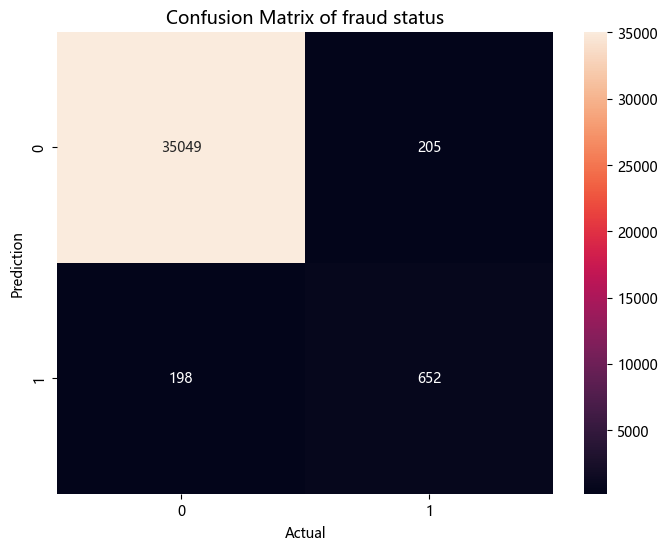

<Figure size 640x480 with 0 Axes>

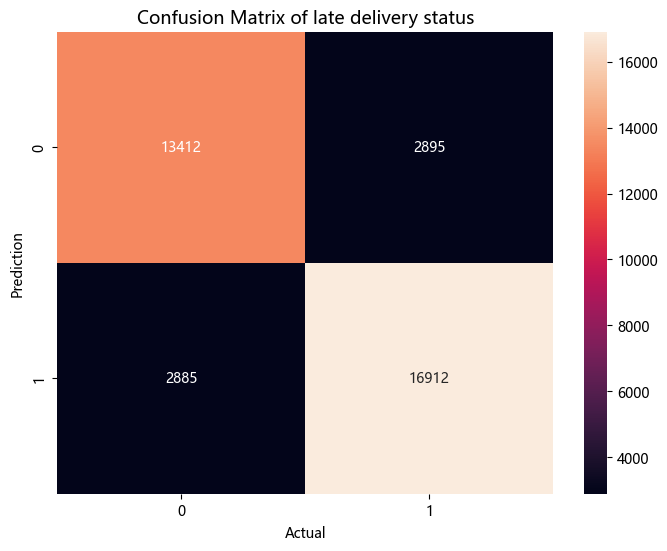

In [68]:
plt.figure(1)
data = np.array(conf_f)
data = data[:, :]
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True,fmt='g')
plt.title('Confusion Matrix of fraud status', fontsize=13)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Prediction', fontsize=10)
plt.show()
plt.figure(2)
data = np.array(conf_l)
data = data[:, :]
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True,fmt='g')
plt.title('Confusion Matrix of late delivery status', fontsize=13)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Prediction', fontsize=10)
plt.show()

### Comparison of prediction results

In [69]:
#Fraud prediction
data_comparision_f = pd.DataFrame({
    "Prediction": yf_pred,
    "Actual": new_yf_test
})
data_comparision_f.head(10)

,Prediction,Actual
80120,0,0
19670,0,0
114887,0,0
120110,0,0
56658,0,0
99465,0,0
40749,0,0
22688,0,0
154389,0,0
47301,0,0


In [70]:
#Late delivery prediction
data_comparision_l = pd.DataFrame({
    "Prediction": yl_pred,
    "Actual": new_yl_test
})
data_comparision_l.head(10)

,Prediction,Actual
80120,1,1
19670,1,1
114887,0,0
120110,1,1
56658,0,0
99465,1,1
40749,1,1
22688,0,0
154389,0,1
47301,1,0


# Conclusion

After analyzing the DataCo Company dataset it has been discovered that both Western Europe and Central America are the regions with the highest number of sales but also the company lost most revenue from these regions only. And both these regions are suspected to the highest number of fraudulent transactions and orders with more late deliveries. The total sales for the company were consistent until the 2017 Quarter 3 and 10% increase in total sales by quarter and then suddenly dipped by almost 65% in 2018 quarter 1. October and November are the months with most sales in the total year. Most people preferred to do payment through debit card, and it should be noted that there is a certain amount of order fraud, since the company was scammed with more than 100k by a single customer. All the orders with the risk of late delivery are delivered late every time. Most of the orders with Cleats, Men's Footwear, and Women's Apparel category products are causing late delivery also these products are suspected to fraud the most.When compared with other classification machine learning models Decision Tree model did a good job of identifying orders with later delivery and detecting fraudulent transactions. 